In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import torch
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path

 No module named 'clip'


In [94]:
df, metadata_df = load_df()

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")

Found 169 result files to load.


Missing results for: init_rn50_d8192
Found missing supervised models for:


pred seed       arch
0   torch_linear_delta_hypopt  123    missing
1   torch_linear_delta_hypopt  123    missing
2   torch_linear_delta_hypopt  123    missing
3   torch_linear_delta_hypopt  123    missing
4   torch_linear_delta_hypopt  123    missing
5   torch_linear_delta_hypopt  123    missing
6   torch_linear_delta_hypopt  123    missing
7   torch_linear_delta_hypopt  123    missing
8   torch_linear_delta_hypopt  123    missing
9   torch_linear_delta_hypopt  123    missing
10  torch_linear_delta_hypopt  123    missing
11  torch_linear_delta_hypopt  123  vits8 cls
12  torch_linear_delta_hypopt  123    missing

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


train-cmplmnt-ntest_train-sbst-ntest  \
enc                                                                   
dino_vitb16_extracts                                         19.042   
dissl_resnet50_d4096_e100_m2                                 32.994   
dissl_resnet50_d8192_e100_m2                                 32.276   
dissl_resnet50_d8192_e400_m6                                 24.528   
dissl_resnet50_d8192_e800_m8                                 23.880   
init_vitb32                                                  96.200   
init_vitl16                                                  93.020   
pirl_rn50w2_headmlp                                          26.080   
simclr_resnet50_d8192_e100_m2                                30.432   
simclr_rn50w2                                                22.516   
simclr_rn50w2_ep100                                          27.646   
swav_rn50w2                                                  20.944   
vicreg_rn50w2                                                22.352   

                               train_train  train-cmplmnt-ntest_test  \
enc                                                                    
dino_vitb16_extracts                 0.811                    23.680   
dissl_resnet50_d4096_e100_m2         0.491                    32.988   
dissl_resnet50_d8192_e100_m2         0.656                    33.756   
dissl_resnet50_d8192_e400_m6         0.464                    28.492   
dissl_resnet50_d8192_e800_m8         0.463                    28.138   
init_vitb32                         92.428                       NaN   
init_vitl16                         87.061                       NaN   
pirl_rn50w2_headmlp                  0.651                    29.732   
simclr_resnet50_d8192_e100_m2        0.465                    33.966   
simclr_rn50w2                        0.472                    26.106   
simclr_rn50w2_ep100                  0.473                    30.854   
swav_rn50w2                          0.248                    24.216   
vicreg_rn50w2                        0.256                    25.392   

                               train_test  union_test  sup_train_train  \
enc                                                                      
dino_vitb16_extracts               23.572         NaN            1.548   
dissl_resnet50_d4096_e100_m2       32.846         NaN            0.845   
dissl_resnet50_d8192_e100_m2       33.578         NaN            0.845   
dissl_resnet50_d8192_e400_m6       28.344         NaN            0.845   
dissl_resnet50_d8192_e800_m8       28.004         NaN            0.845   
init_vitb32                        95.864         NaN            1.132   
init_vitl16                        92.952         NaN            0.553   
pirl_rn50w2_headmlp                29.502         NaN            0.743   
simclr_resnet50_d8192_e100_m2      33.920         NaN            0.845   
simclr_rn50w2                      26.060         NaN            0.743   
simclr_rn50w2_ep100                30.706         NaN            0.743   
swav_rn50w2                        23.980         NaN            0.743   
vicreg_rn50w2                      25.326         NaN            0.743   

                               sup_train_test  agg_risk  approx  usability  \
enc                                                                          
dino_vitb16_extracts                   16.046    23.572   1.548     -0.737   
dissl_resnet50_d4096_e100_m2           24.244    32.846   0.845     -0.354   
dissl_resnet50_d8192_e100_m2           24.244    33.578   0.845     -0.189   
dissl_resnet50_d8192_e400_m6           24.244    28.344   0.845     -0.381   
dissl_resnet50_d8192_e800_m8           24.244    28.004   0.845     -0.382   
init_vitb32                            20.204    95.864   1.132     91.296   
init_vitl16                            15.880    92.952   0.553     86.508   
pirl_rn50w2_headmlp                    22.102    29.502   0.743     -0.

The following results seem suspicously bad:


agg_risk
enc                        
beit_vitb16_pt22k    57.194

The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


approx  usability  probe_gen  enc_gen
enc                                                             
dino_vits16_extractb          NaN        NaN     10.441    4.102
dino_vits16_last              NaN        NaN      4.293    3.812
dino_vits8_last               NaN        NaN      4.449    3.818
ibot_vits16                   NaN        NaN      4.515    2.740
init_vits16                   NaN        NaN      1.423    0.324
init_vits16_dino_extractb     NaN        NaN      3.921    0.050
mocov3_vits_ep300             NaN        NaN      5.416    3.850
msn_vits16_ep800              NaN        NaN      5.070    3.288
mugs_vits16_ep100             NaN        NaN      5.108    3.066
mugs_vits16_ep300             NaN        NaN      5.269    3.486
mugs_vits16_ep800             NaN        NaN      4.941    3.710
sup_vits16                    NaN        NaN      6.255    5.376
sup_vits16_dino_extractb      NaN        NaN      5.786    6.644

In [95]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
std["delta-100%-3shot"] = std["train-nperclass-3_test"] - std["train_test"]
METRICS = CORE_METRICS + ["delta-100%-3shot"]

Found 1123 result files to load.


In [96]:
df = pd.merge(left=df,
              right=std[METRICS[1:]],
              right_index=True,
              left_index=True)

# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection_arch', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']

df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
df_nona = df[~df[COMPONENTS ].isna().any(axis=1)].copy()
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

melted = melt(df)
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-3shot"])


CORE_STATISTICS = ['train_rank', "trainaug_vars","trainaug_nc1norm", 
                   'trainaug_alignment', "train_uniformity"]



melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in CORE_METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

## All Radar
Let's plot the (relative) decomposition of results. Note that we only plot the ones that have no NaN.

In [97]:
from IPython.display import IFrame,display

is_plot_radar = False
save_path="figures/all_radar.pdf"

if is_plot_radar:
    isna = df[COMPONENTS].isna().any(axis=1)
    plot_radar_grid(df[~isna], ncols=12, 
                    components=["agg_risk"]+COMPONENTS_ONLY, 
                    #models=~isna, 
                    save_path=save_path,
                    config_kwargs=dict(is_despine=False, font_scale=1, is_use_tex=True),
                    space_per_col=2)
else:
    out = IFrame(Path("..") / save_path, width=1000, height=500)
    display(out)

## All Results

In [98]:
large_table = df[["epochs"]+COMPONENTS_ONLY+CORE_METRICS].copy()
large_table[r"100\%"] =  large_table["train_test"] # 100 -
large_table["30 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table[r"1\%"] =  large_table['train-balsbst-ntrain0.01_test'] # 100 -
large_table["5 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table["3 shot"] =  large_table['train-nperclass-3_test']
large_table = large_table.drop(columns=CORE_METRICS)
model_arch, rest = zip(*[ clean_model_name(i) for i in large_table.index ])
large_table["Objective"], large_table["Arch."] = zip(*[ m.rsplit(" ",1) for m in model_arch ])
rest = [r.replace('_','\_')  for r in rest]
large_table["Other"] = [rf"\tiny{{{r}}}"  for r in rest] # can use \miniscule if want smaller
large_table = large_table.rename(columns=PRETTY_RENAMER).set_index(["Objective","Arch.","Epochs","Other"])
large_table.columns = pd.MultiIndex.from_arrays([[r"\textbf{Risk Component}"]*len(COMPONENTS_ONLY) + [r"\textbf{Aggregated Error}"]*len(CORE_METRICS), 
                                                large_table.columns])
large_table = large_table.sort_index(level=[0,1,2])



In [99]:
IS_PRINT_TEXT_TABLE = False # set True to print the table

tex_table = large_table.style.format(precision=2
                                    ).to_latex(multicol_align="c",
                                   hrules=True, 
                                   label="appx:tab:all_results",
                                    position="h",
                                 environment="longtable",
                                 multirow_align="t",
                            )

# adds multirow
tex_table= tex_table.replace("\\\\\n\\multirow","\\\\\n\\midrule\n\\multirow")
unique_obj = large_table.groupby("Objective").nunique().max(axis=1)
for o in unique_obj[unique_obj == 1].index:
    tex_table= tex_table.replace("\\\\\n"+o,"\\\\\n\\midrule\n"+o)

rows = tex_table.split("\n")
new_cols = r"} & \textbf{".join([r" "+i for i in rows[5].split("&  &")[0].split("&")]
                              ) + r"} & \textbf{" + r"} & \textbf{".join(rows[4].split("&  &")[-1].split("&"))
new_cols = r"\textbf{" + new_cols[:-2] + r"} \\"

if IS_PRINT_TEXT_TABLE:
    print(r"\begin{tiny}")
    for r in rows:
        if r.endswith(r"  &  &  &  \\"):
            continue
        elif r == rows[4]:
            print(new_cols)
            continue


        print(r)
        if r == rows[3]:
            print(r" \cmidrule(lr){5-8}  \cmidrule(lr){9-11} \ ")


        pass
    print(r"\end{tiny}")

## Validating results

### Differences with published results

In [100]:
diff = df.copy()
diff[r"100\%"] = diff["train_test"] - (100 - diff["top1acc_in1k_official"])
diff[r"1\%"] = diff["train-balsbst-ntrain0.01_test"] - (100 - diff["top1acc_in1k-1%_official"])
diff[r"5 shot"] = diff["train-nperclass-5_test"] - (100 - diff["top1acc_in1k-c5_official"])
diff = diff.iloc[:,-3:].copy()

In [101]:
print(diff.describe())
save_path = "figures/diff_published.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax = sns.stripplot(diff, ax=ax, size=7)
    #plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel("$\Delta$ with published ($\downarrow$ is better)")
    ax.set_xlabel("Probe training data")
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

            100\%       1\%    5 shot
count  101.000000  9.000000  3.000000
mean     1.180020  0.265111 -0.344667
std      3.187665  2.330321  0.475657
min    -17.566000 -4.272000 -0.854000
25%      0.409999 -0.350000 -0.561000
50%      0.964000  0.170000 -0.268000
75%      1.523999  1.526000 -0.090000
max     17.584002  4.028000  0.088000


In [102]:
import scipy.stats as stats
print(stats.ttest_rel(df["train_test"], (100 - df["top1acc_in1k_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-balsbst-ntrain0.01_test"], (100 - df["top1acc_in1k-1%_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-nperclass-5_test"], (100 - df["top1acc_in1k-c5_official"]), nan_policy="omit"))

Ttest_relResult(statistic=3.7202936416971837, pvalue=0.0003287684823069778)
Ttest_relResult(statistic=0.3412977850347525, pvalue=0.7416705846016705)
Ttest_relResult(statistic=-1.2550651119275351, pvalue=0.3362312702180341)


In [103]:
max_delta = 3
print(f"Values that are worst by more than {max_delta}%")
idx = (diff.abs() > max_delta).any(axis=1)
big_diff = diff[idx].copy()
big_diff["epochs"] = df.loc[idx,"epochs"]

Values that are worst by more than 3%


In [104]:
def table_to_tex(table, size_other=r"\tiny", size_all=None, **kwargs):
    table = table.copy()
    model_arch, rest = zip(*[ clean_model_name(i) for i in table.index ])
    table["Objective"], table["Arch."] = zip(*[ m.rsplit(" ",1) for m in model_arch ])
    rest = [r.replace('_','\_')  for r in rest]
    table["Other"] = [size_other+rf"{{{r}}}"  for r in rest] # can use \miniscule if want smaller
    table = table.rename(columns=PRETTY_RENAMER).set_index(["Objective","Arch.","Epochs","Other"])
    #table.columns = pd.MultiIndex.from_arrays([[r"\textbf{Risk Component}"]*len(COMPONENTS_ONLY) + [r"\textbf{Aggregated Error}"]*len(CORE_METRICS), table.columns])
    table = table.sort_index(level=[0,1,2])
    
    styler = table.style.format(precision=2, na_rep="")
    tex = styler.to_latex(multicol_align="c",
                           hrules=True, 
                           position="h",
                           multirow_align="t",
                          position_float="centering",
                          **kwargs
                            )
    tex= tex.replace("\\\\\n\\multirow","\\\\\n\\midrule\n\\multirow")
    unique_obj = table.groupby("Objective").nunique().max(axis=1)
    for o in unique_obj[unique_obj == 1].index:
        tex = tex.replace("\\\\\n"+o,"\\\\\n\\midrule\n"+o)
    rows = tex.split("\n")
    
    for i_col,r  in enumerate(rows):
        if r.startswith(" &  &  &  &"):
            break
    
    # bold and add all columns on the same row
    new_cols = r"} & \textbf{".join([r" "+i for i in rows[i_col+1].split("&  &")[0].split("&")]
                              ) + r"} & \textbf{" + r"} & \textbf{".join(rows[i_col].split("&  &")[-1].split("&"))
    new_cols = r"\textbf{" + new_cols[:-2] + r"} \\"
    
    if size_all:
        print(rf"\begin{{{size_all}}}")
    for r in rows:
        if r.endswith(r"&  &  &  \\"):
            continue
        elif r == rows[i_col]:
            print(new_cols)
            continue

        print(r)

    if size_all:
        print(rf"\end{{{size_all}}}")



In [105]:
table_to_tex(big_diff, size_all="small", label="appx:tab:big_diff", size_other=r"\small")

\begin{small}
\begin{table}[h]
\centering
\label{appx:tab:big_diff}
\begin{tabular}{llllrrr}
\toprule
\textbf{ Objective } & \textbf{  Arch. } & \textbf{  Epochs } & \textbf{  Other } & \textbf{ 100\% } & \textbf{ 1\% } & \textbf{ 5 Shot } \\
\midrule
BYOL & RN50 & 1000 & \small{augnocolor} & -4.07 &  &  \\
\midrule
DISSL & RN50 & 100 & \small{dnone\_e100\_m2} & 5.04 &  &  \\
\midrule
DeepCluster & RN50 & 200 & \small{bs512\_ep200\_mmselfsup} & -17.57 &  &  \\
\midrule
\multirow[t]{2}{*}{Jigsaw} & \multirow[t]{2}{*}{RN50} & \multirow[t]{2}{*}{105} & \small{in22k} & 17.58 &  &  \\
 &  &  & \small{} & 10.77 &  &  \\
\midrule
\multirow[t]{2}{*}{MSN} & ViT-B16 & 600 & \small{ep600} &  & -4.27 &  \\
 & ViT-L16 & 300 & \small{ep600} & 6.36 &  &  \\
\midrule
MUGS & ViT-S16 & 800 & \small{ep800\_extracts} & -1.71 & 4.03 &  \\
\midrule
PIRL & RN50 & 200 & \small{ep200} & 3.62 &  &  \\
\midrule
Relativeloc & RN50 & 70 & \small{70ep\_mmselfsup} & 3.16 &  &  \\
\midrule
\multirow[t]{2}{*}{RotNet} 

In [106]:
curr = melted_Onlymetrics.rename(columns=dict(metric="Probe training", metric_value="Error"))
curr["Probe training"] = curr["Probe training"].replace(PRETTY_RENAMER.exact_match)

In [107]:
save_path = "figures/density_metrics.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    sns.kdeplot(curr, 
                x="Error", 
                fill=True, 
                cut=0, 
                hue='Probe training')
    
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

In [109]:
for m1,m2 in zip(CORE_METRICS[:-1],CORE_METRICS[1:]):
    delta = (df[m1]-df[m2])
    assert (delta[~delta.isna()] < 0).all(), f"error {m1} {m2}"

### Trends

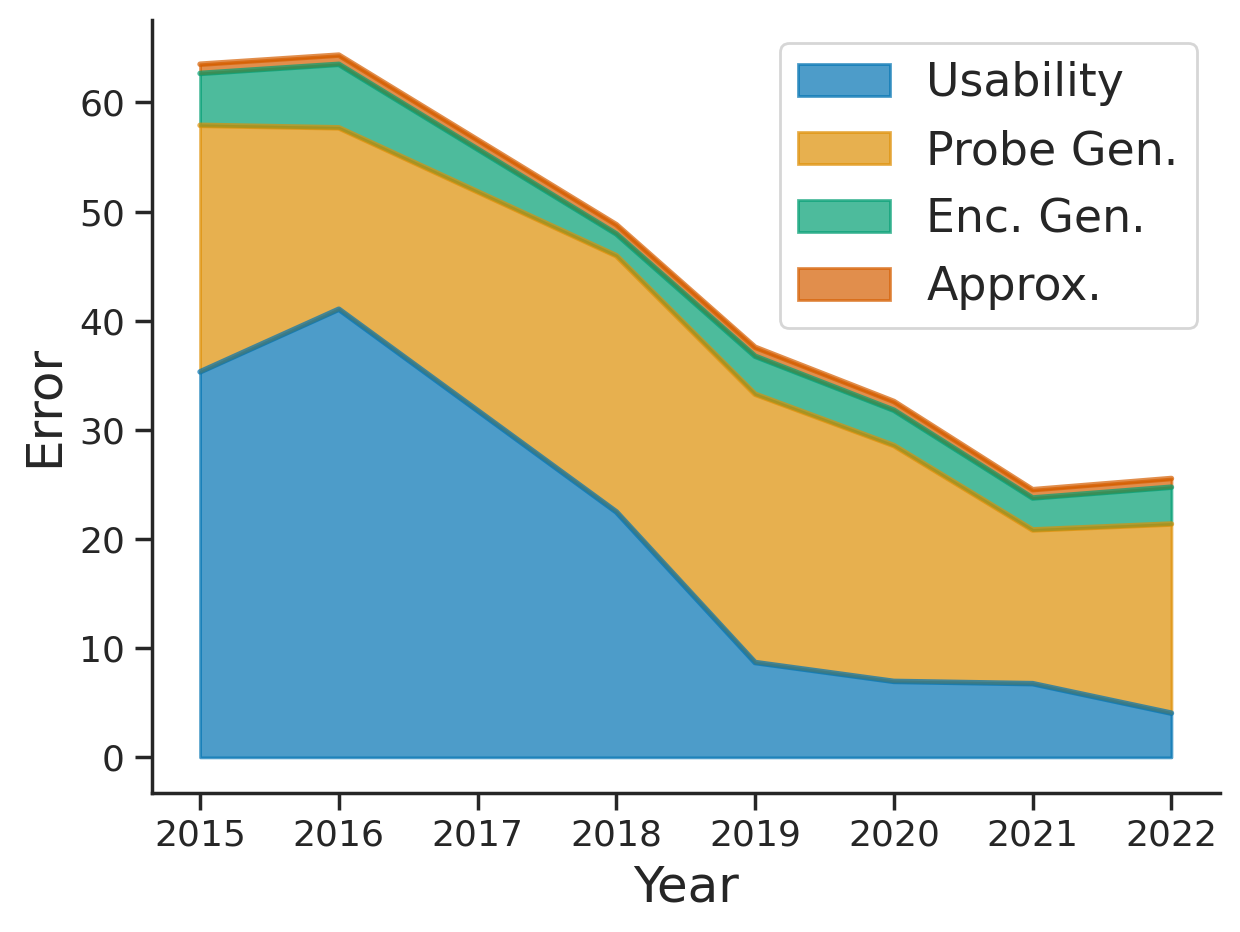

In [110]:
plot_trend(df, 
           is_min=False, 
           save_path="figures/trend_avg_all.pdf")

This was the mean over each model. For the min see the one in the main paper

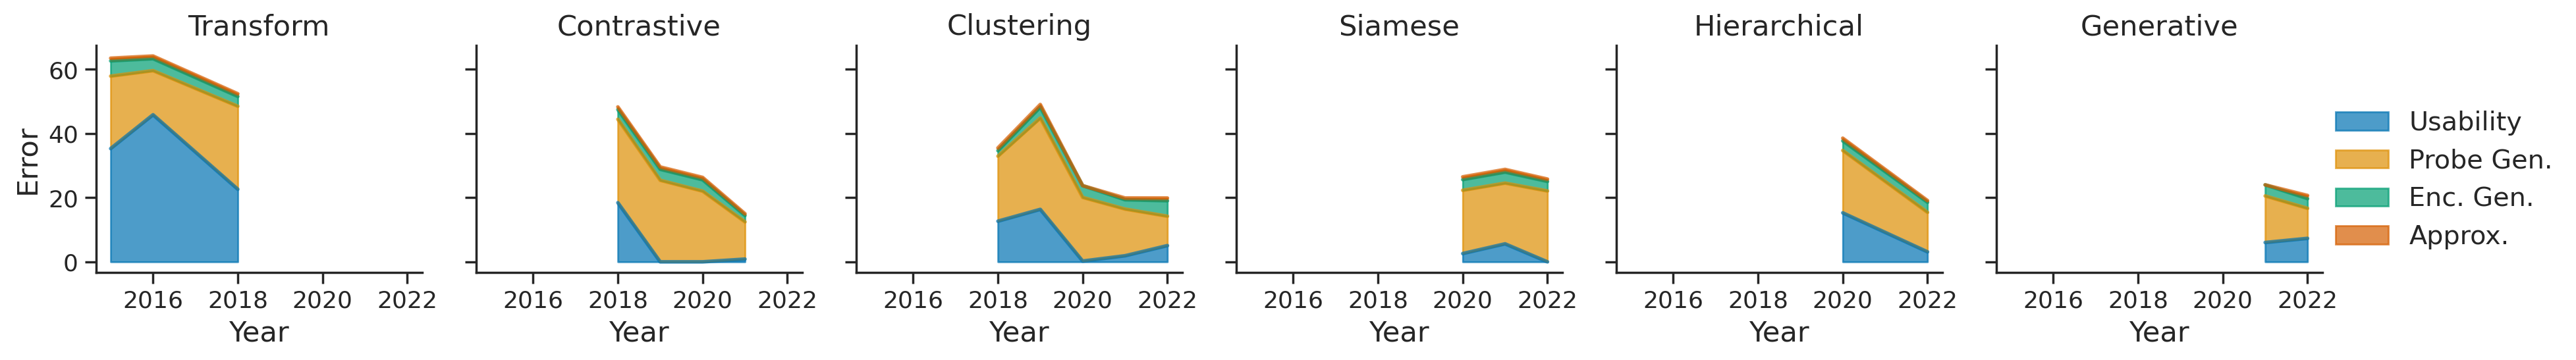

In [111]:
ordering = ["Transform","Contrastive","Clustering","Siamese","Hierarchical","Generative"]
plot_trend_split(df, 
                 "ssl_mode", ordering=ordering, is_min=True, 
                 save_path="figures/trend_mode.pdf")

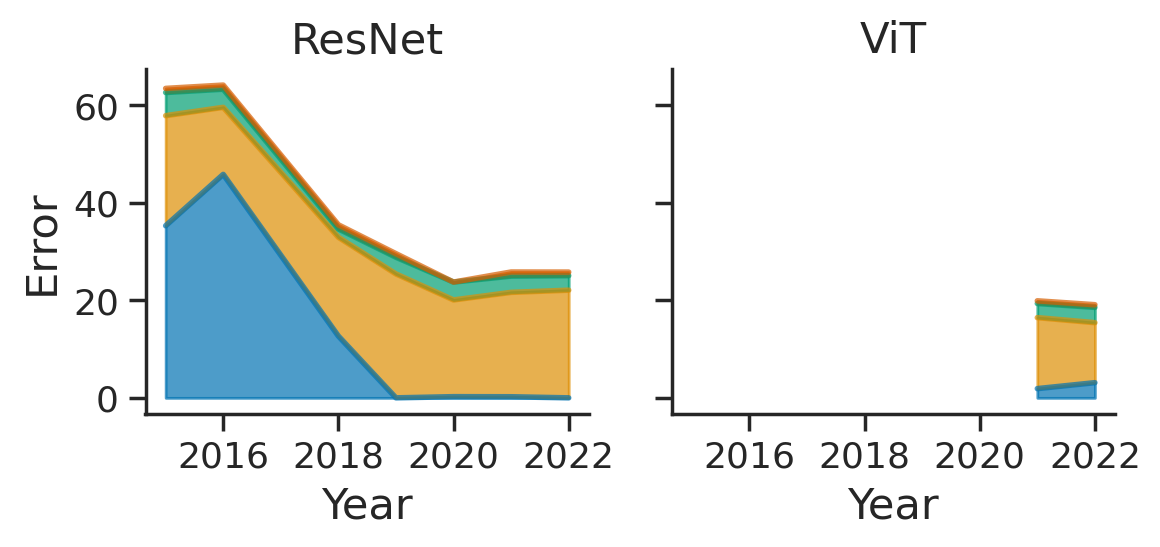

In [112]:
plot_trend_split(df_IN, 
                 "family", 
                 ordering=None, is_min=True, is_legend=False,
                 save_path="figures/trend_arch.pdf",
                 pretty_renamer=dict(resnet="ResNet", vit="ViT")
                )


### Tradeoffs

First let us look at all tradeoffs

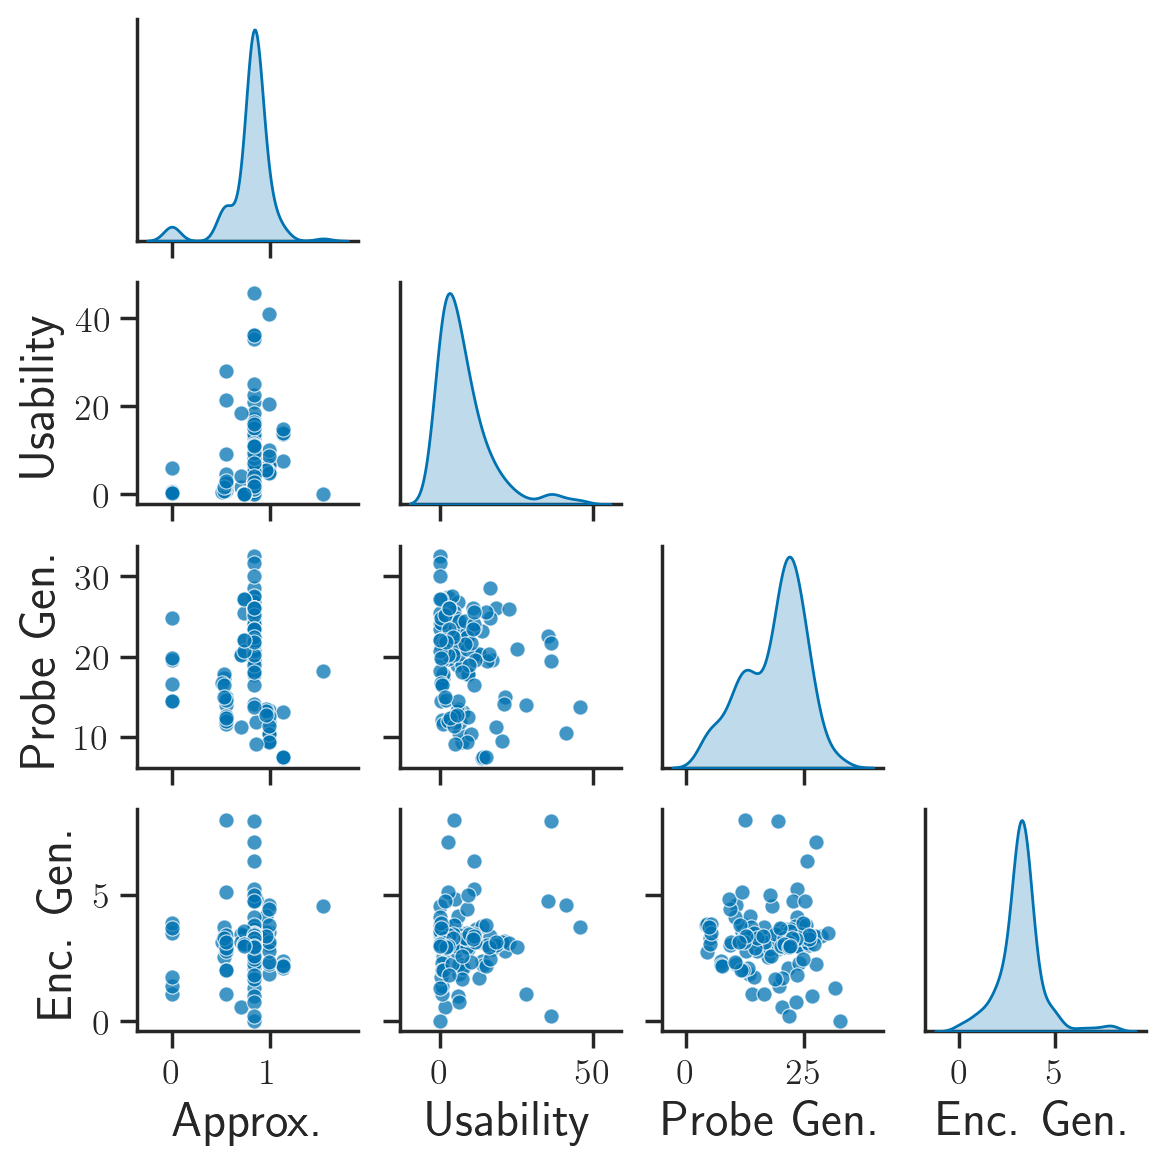

In [113]:
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    g = sns.pairplot(df[COMPONENTS_ONLY].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             corner=True)
    
    
    plt.savefig("figures/all_tradeoffs.pdf", bbox_inches='tight', pad_inches=0.2)

As discussed in the the paper there are no apparent tradeoofs, in particular we do not see anything special in the 

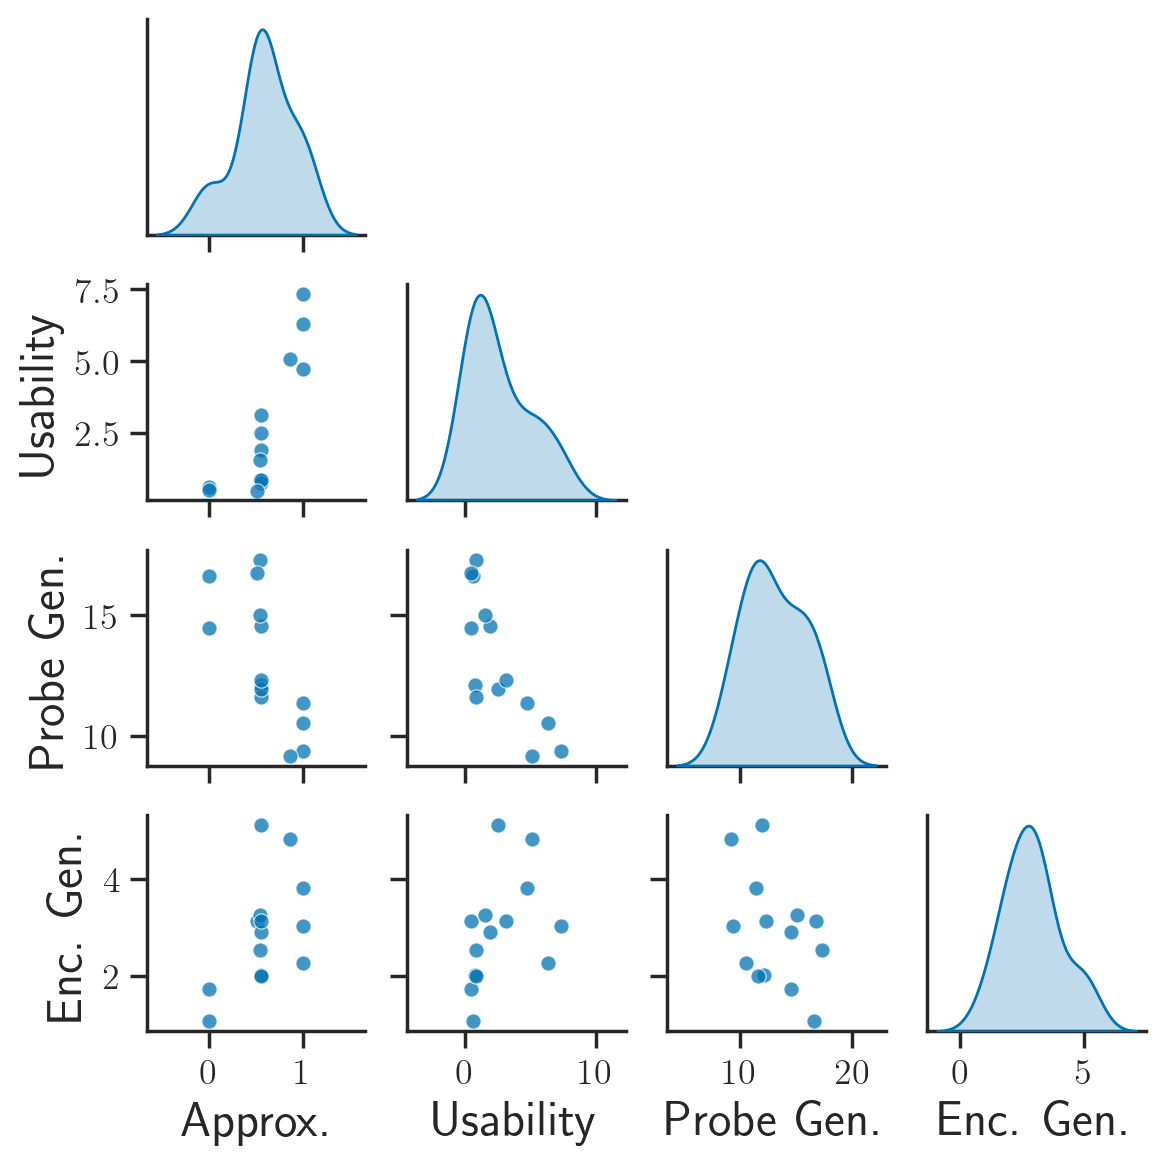

In [114]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    g = sns.pairplot(filter_by_quantile(df, is_year=False, quantile=0.1)[COMPONENTS_ONLY].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             corner=True)
    

now let us look at the best models for each years, as we did in the the main paper.
Note that we skip years < 2018 (as there are very few models for those years + they perform terribly so we cannot see differences in the newer models due to axis scaling)  and models for which we could estimate approximation error (isntead of those for which we set it to zero).

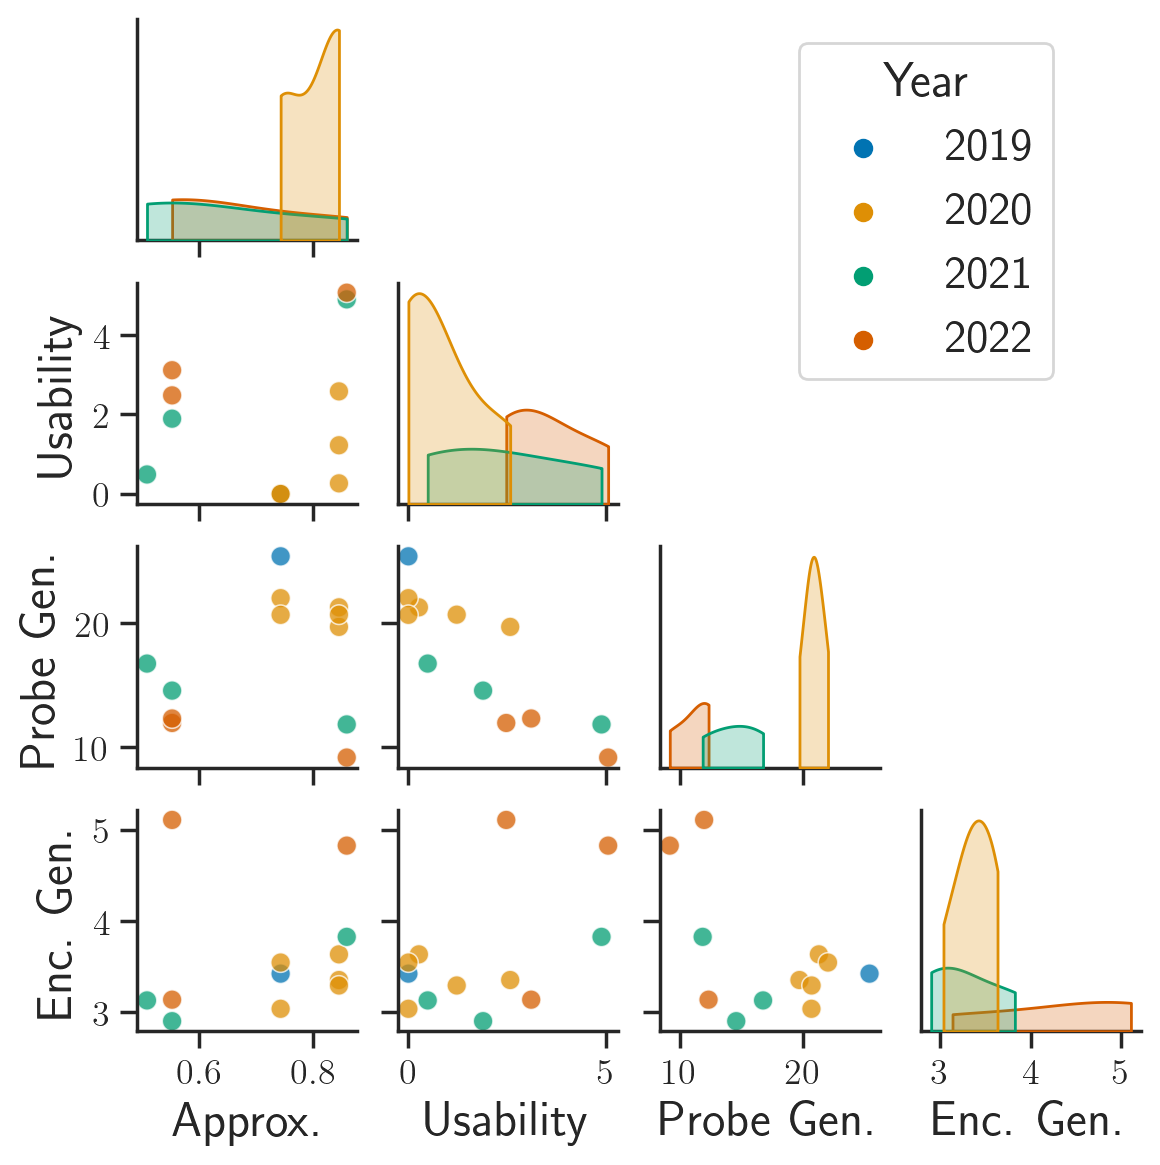

In [115]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    
    data=filter_by_quantile(df_IN, is_year=True, quantile=0.1)[COMPONENTS_ONLY+["year"]].query("year >= 2019 & approx != 0").rename(columns=PRETTY_RENAMER)
    data["Year"] = data["Year"].astype("category")
    
    g = sns.pairplot(data,
            hue="Year",
                     height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=50, alpha=0.75),
             corner=True,
                    diag_kws=dict(cut=0)
                    )
    sns.move_legend(g, "lower center", bbox_to_anchor=(.65, .65), ncol=1, frameon=True)

    
    plt.savefig("figures/all_tradeoffs_best.pdf", bbox_inches='tight', pad_inches=0.2)
    #g.set(xscale="log",yscale="log")
    

In [116]:
filter_by_quantile(df_IN, is_year=True, quantile=0.15)[COMPONENTS_ONLY+["year"]].rename(columns=PRETTY_RENAMER).query("Year >= 2022")


Approx.  Usability  Probe Gen.  Enc. Gen.  Year
enc                                                                         
beitv2_vitb16_pt1k_ep300    0.996513   7.324338    9.359149   3.026000  2022
msn_vitb4_ep300             0.858748   5.066631    9.152622   4.827999  2022
msn_vitl7_ep200             0.552543   2.481878   11.949579   5.110000  2022
mugs_vitb16_ep400_extractb  0.538259   1.540861   15.022880   3.265999  2022
mugs_vitl16_ep250           0.552543   3.114895   12.312562   3.136000  2022

#### Initialized

In [117]:
data = df_init.copy()
data["architecture"] = data["architecture"].apply(lambda x: PRETTY_RENAMER(x))
data["family"] = data["family"].apply(lambda x: dict(vit="ViT", resnet="ResNet")[x])
data = data[~data.usability.isna()]
data = data .rename(columns=PRETTY_RENAMER).rename(columns={"Z Dim.": r"\textbf{Z Dim.}",
                                                 "Architecture": r"\textbf{Architecture}"})

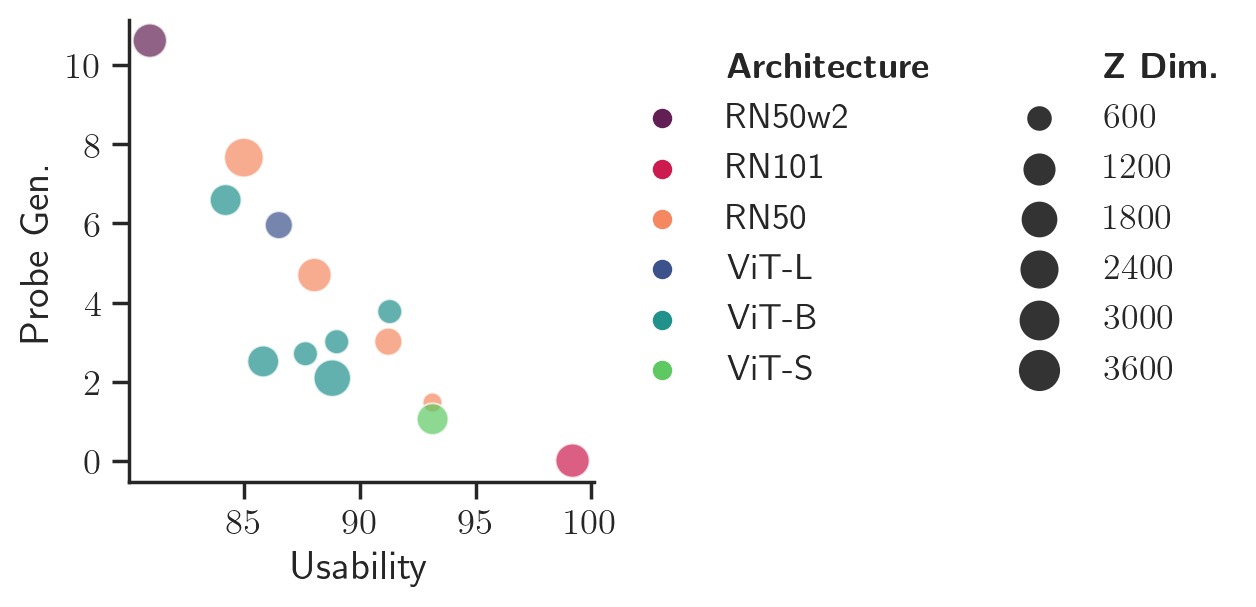

In [118]:
from matplotlib.colors import SymLogNorm

palette = sns.color_palette("rocket", n_colors=3) + sns.color_palette("viridis", n_colors=3)
with plot_config(is_use_tex=True, rc={"legend.fontsize": 13}, 
                 palette=palette, font_scale=1.2):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    g=sns.scatterplot(data=data, 
                      x="Usability", 
                      y="Probe Gen.", 
                      hue=r"\textbf{Architecture}",
                      hue_order=["RN50w2","RN101","RN50","ViT-L","ViT-B","ViT-S"],
                      #style="Family",
                      size=r"\textbf{Z Dim.}",
                      size_norm=SymLogNorm(linthresh=1,base=2),
                      sizes=(50, 200),
                      s=150, ax=ax, alpha=0.7)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=2, frameon=False)
    ax.yaxis.get_major_locator().set_params(integer=True)
    #g.set(xscale="log",yscale="log")
    
plt.savefig("figures/tradeoff_initialized.pdf", bbox_inches='tight', pad_inches=0.1)

### Alternative decomposition

In [119]:
%%capture capt
df_alternative, _ = load_df(traverse_path=["down","down","right"])
idx_alternative = ~df_alternative["probe_gen"].isna() # models for which you have the alternative decomposition
df_alternative = df_alternative[idx_alternative]

df_notalternative, _ = load_df()
df_notalternative = df_notalternative[idx_alternative]

In [120]:
df_alternative = df_alternative[["enc_gen","probe_gen"]].reset_index()
df_alternative["alternative"] = True
df_notalternative = df_notalternative[["enc_gen","probe_gen"]].reset_index()
df_notalternative["alternative"] = False

In [121]:
df_alt = pd.concat([df_alternative,df_notalternative])
df_alt["enc"] = df_alt["enc"].apply(lambda x: clean_model_name(x)[0])
df_alt = df_alt.query("enc != 'RotNet RN50'")

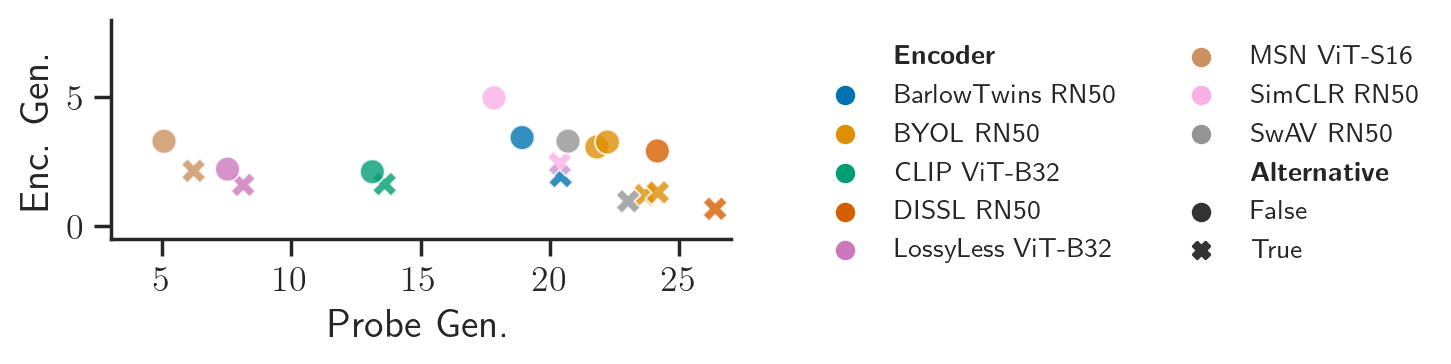

In [122]:
with plot_config(is_use_tex=True,  font_scale=1.2,
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, 
                     "legend.fontsize": 10}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    data=data=df_alt.rename(columns=PRETTY_RENAMER
                           ).rename(columns=dict(Enc=r"\textbf{Encoder}",
                                                 Alternative=r"\textbf{Alternative}"))
    g=sns.scatterplot(data=data, 
                      y="Enc. Gen.", x="Probe Gen.", 
                      style=r"\textbf{Alternative}", hue=r"\textbf{Encoder}", 
                      s=80,  ax=ax, alpha=0.8)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 1),ncol=2, frameon=False)
    plt.axis('scaled')
    g.set(ylim=[-0.5,8],xlim=[3,27])
    
plt.savefig("figures/alternative.pdf", bbox_inches='tight', pad_inches=0.1)

### Evaluation

#### Correlations

Let us check the correlation between the actual performance and usability/probe gen

In [123]:
for m in CORE_METRICS:
    print(m)
    print("usability")
    compute_correlations(df["usability"], df[m], correlations=["Kendall"])
    print("gen")
    compute_correlations(df["probe_gen"], df[m], correlations=["Kendall"])
    print()


train_test
usability
Kendall correlation: 0.455 pvalue = 1.83e-14
gen
Kendall correlation: 0.410 pvalue = 8.40e-13

train-nperclass-30_test
usability
Kendall correlation: 0.459 pvalue = 1.01e-13
gen
Kendall correlation: 0.422 pvalue = 1.08e-12

train-balsbst-ntrain0.01_test
usability
Kendall correlation: 0.437 pvalue = 2.04e-13
gen
Kendall correlation: 0.434 pvalue = 3.30e-14

train-nperclass-5_test
usability
Kendall correlation: 0.420 pvalue = 1.50e-12
gen
Kendall correlation: 0.439 pvalue = 1.80e-14

train-nperclass-3_test
usability
Kendall correlation: 0.398 pvalue = 6.35e-11
gen
Kendall correlation: 0.447 pvalue = 2.45e-14



Let's see this visually

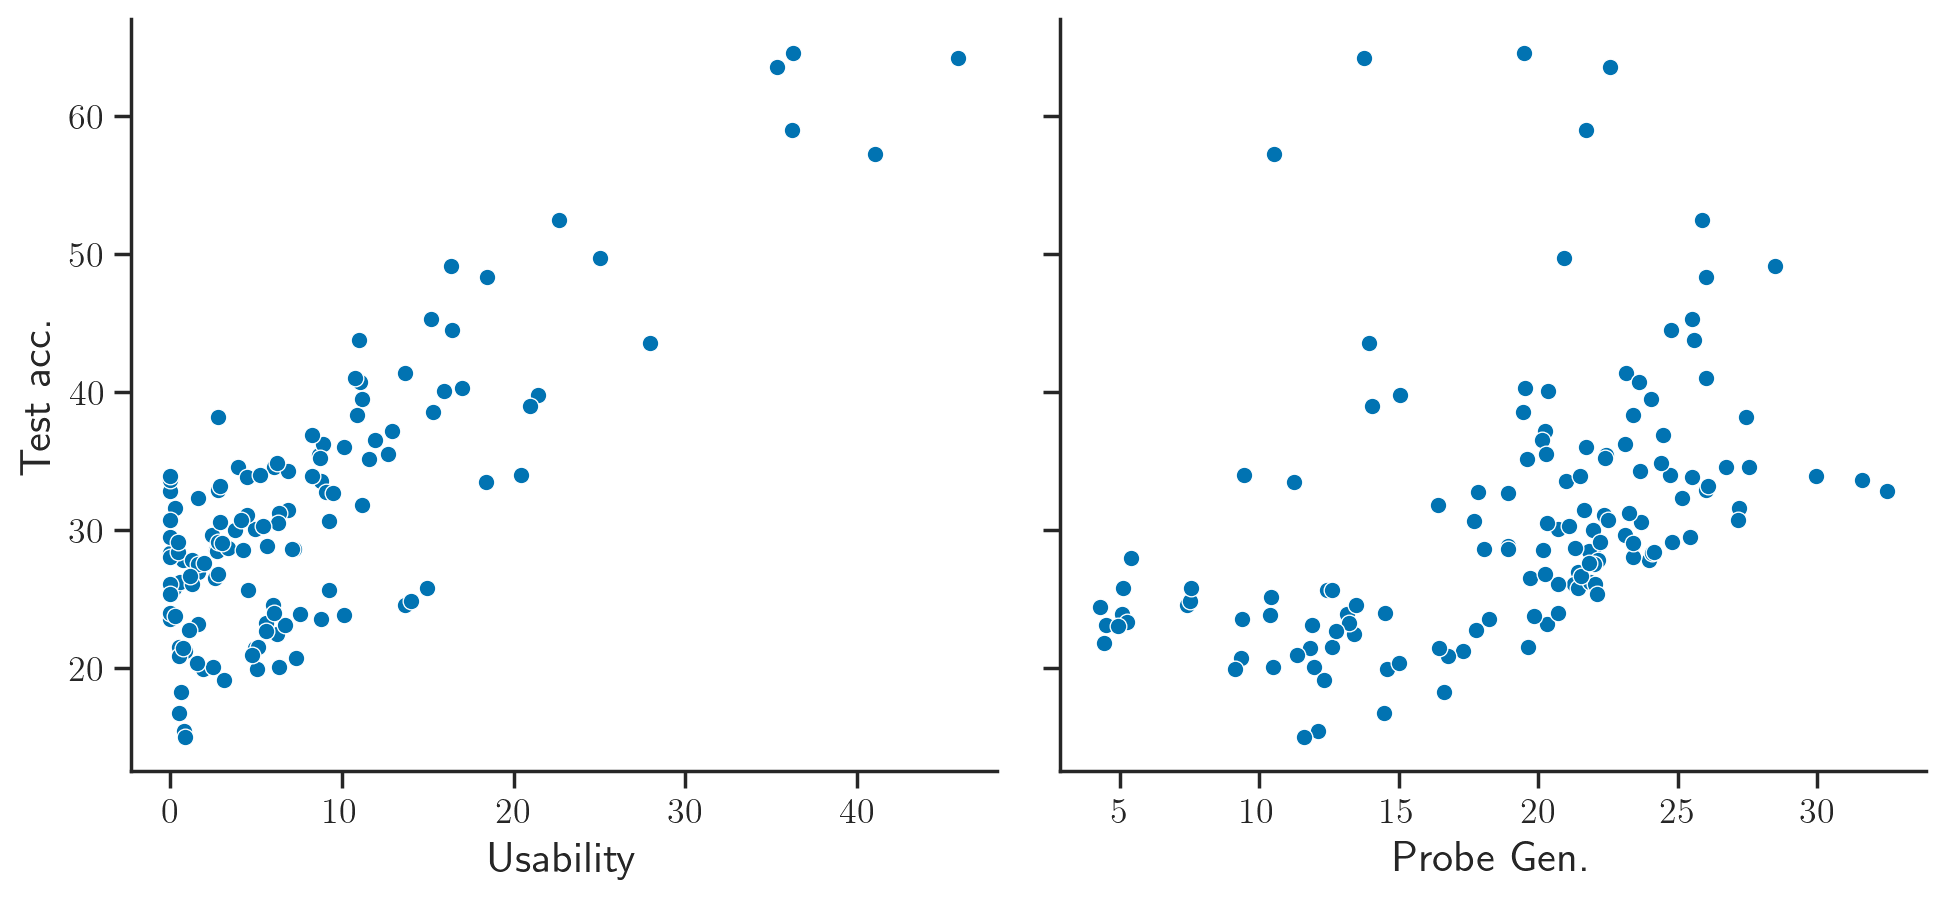

In [68]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel="Test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

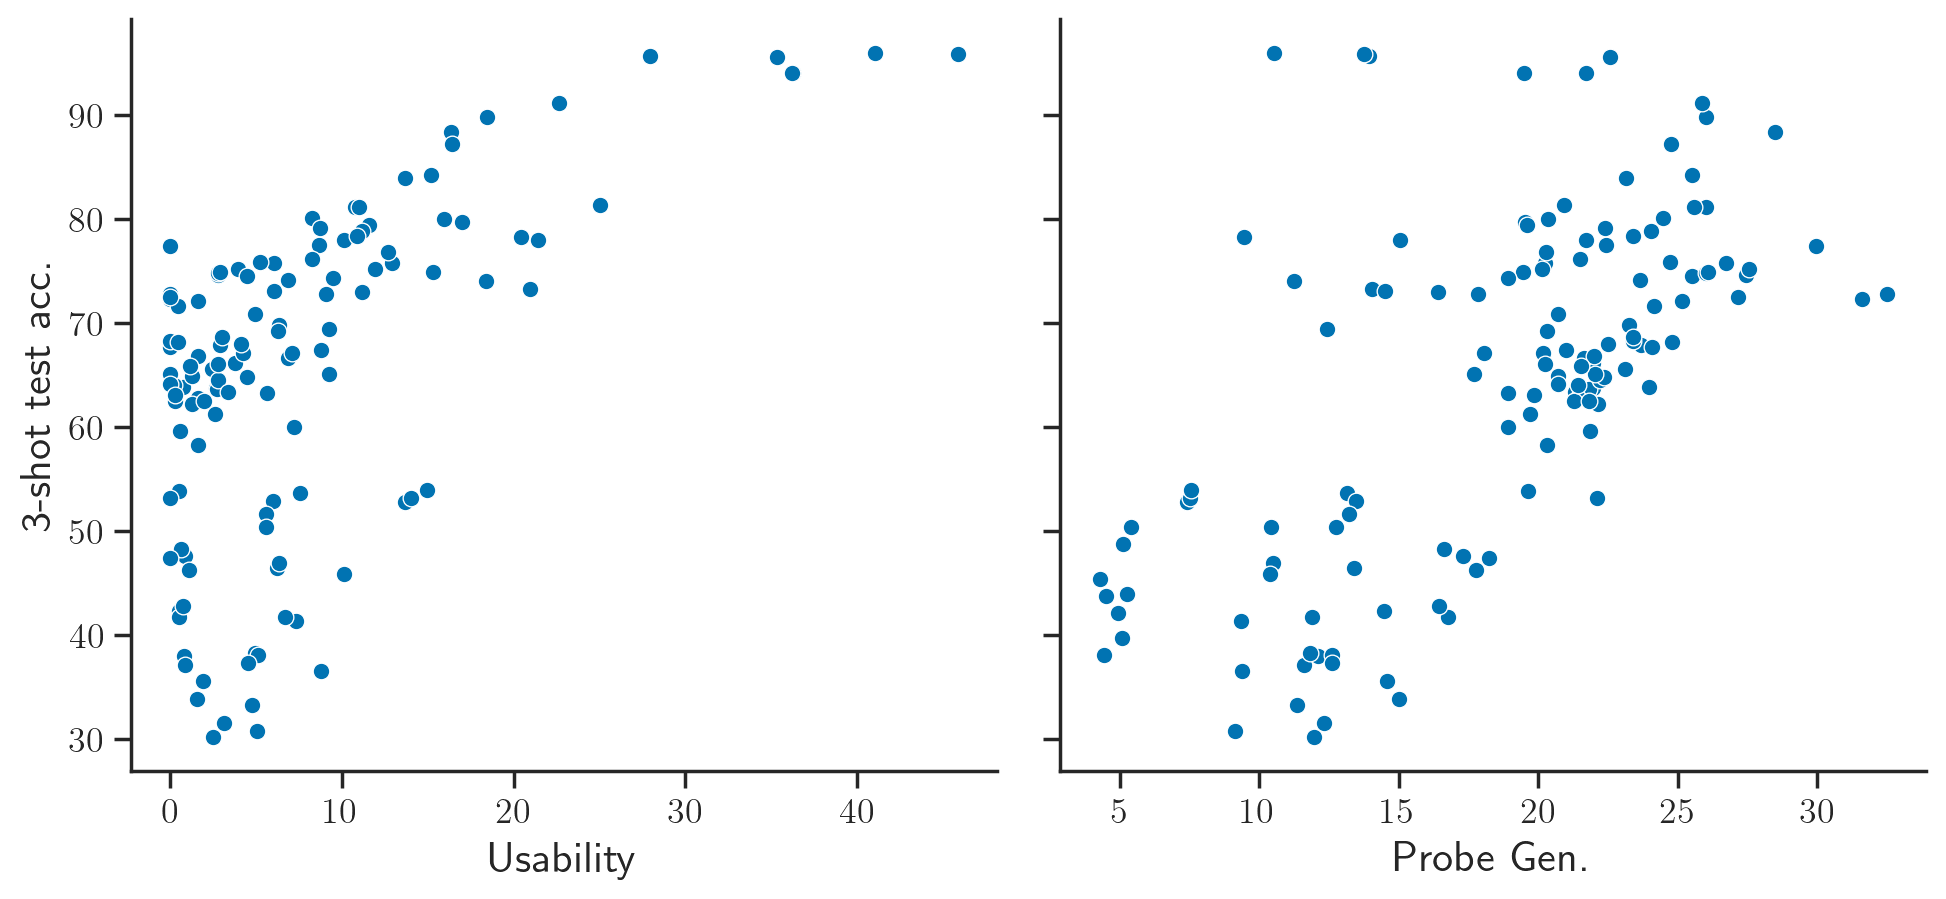

In [132]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train-nperclass-3_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel=r"3-shot test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

Note that usability is still correlated with performance.
This is not true if we consider the difference between 100 and few shot:

In [133]:
df_nona = df[~df[COMPONENTS].isna().any(axis=1)].copy()
for m in CORE_METRICS[1:]:
    print(m)
    
    for c in ["usability","probe_gen"]:
        print(c)
        compute_correlations(df_nona[c], 
                             df_nona[m] - df_nona["train_test"] , 
                             correlations=["Kendall"])
    print()

train-nperclass-30_test
usability
Kendall correlation: 0.360 pvalue = 5.01e-09
probe_gen
Kendall correlation: 0.398 pvalue = 1.01e-10

train-balsbst-ntrain0.01_test
usability
Kendall correlation: 0.316 pvalue = 1.07e-07
probe_gen
Kendall correlation: 0.410 pvalue = 4.61e-12

train-nperclass-5_test
usability
Kendall correlation: 0.212 pvalue = 3.72e-04
probe_gen
Kendall correlation: 0.418 pvalue = 1.84e-12

train-nperclass-3_test
usability
Kendall correlation: 0.106 pvalue = 8.05e-02
probe_gen
Kendall correlation: 0.426 pvalue = 2.37e-12



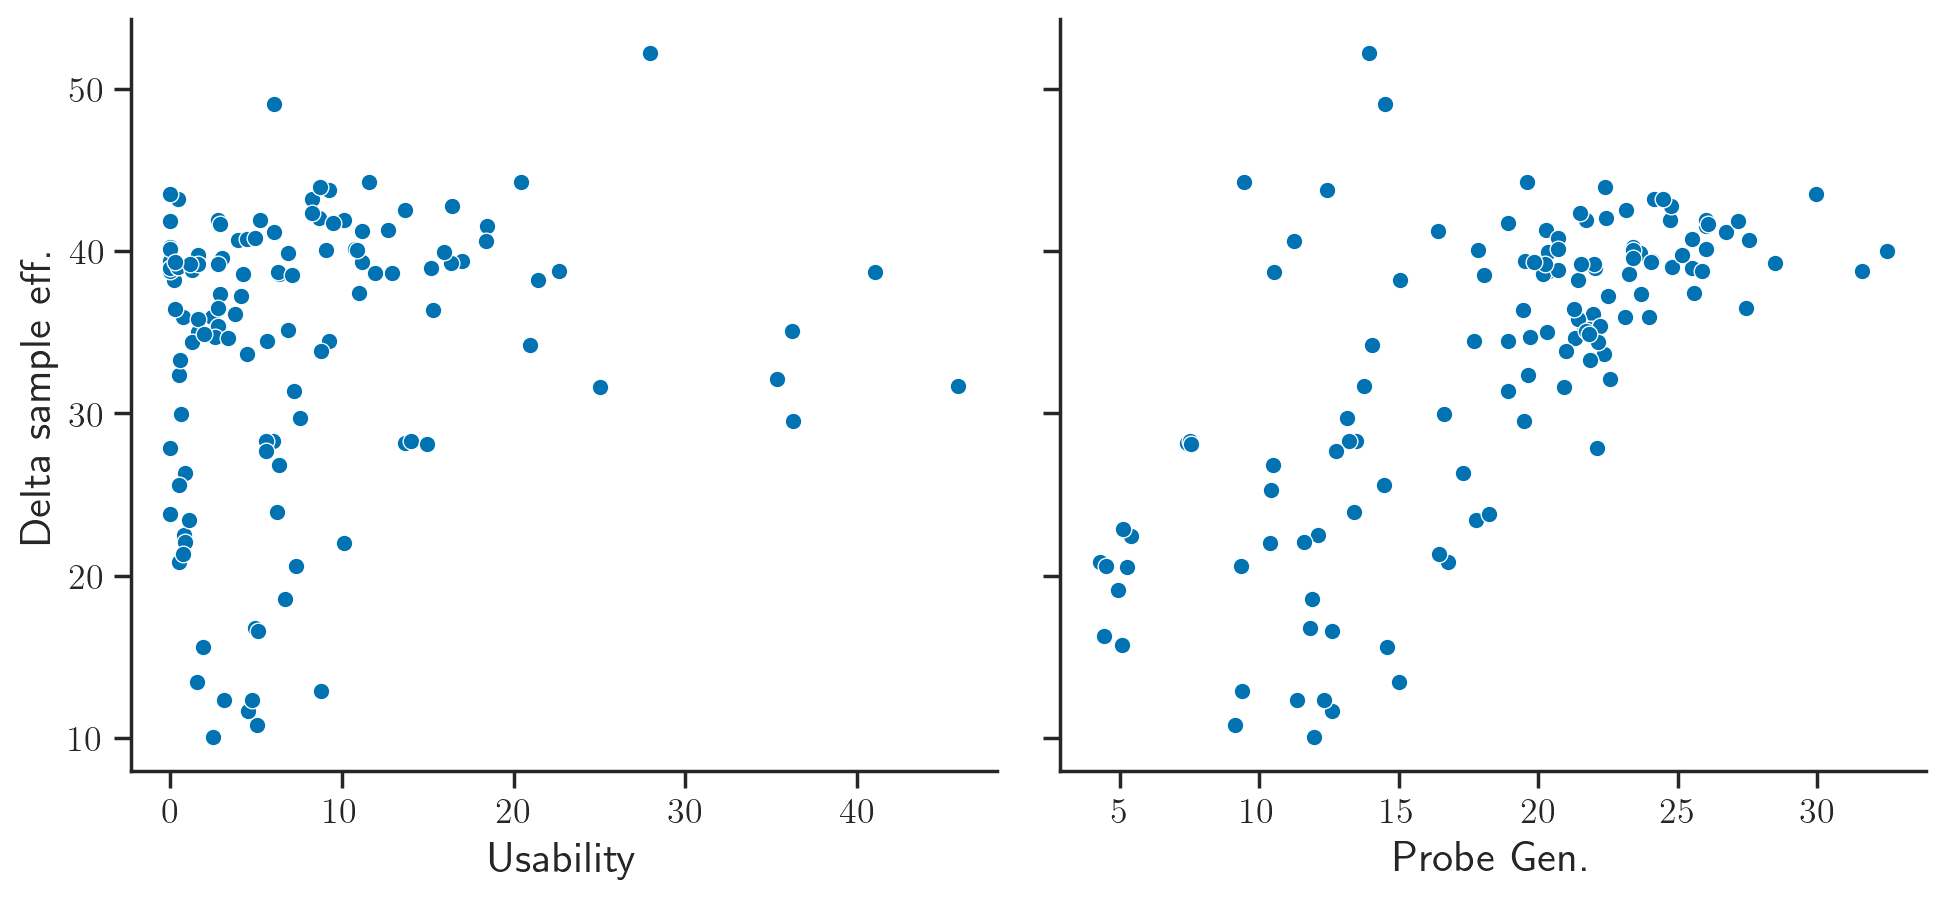

In [134]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['delta-100%-3shot']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel="Delta sample eff.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

#### Scaling laws

In [864]:
data = melt(df_nona.reset_index(), components=CORE_METRICS, var_name="metrics")
data["n_samples"] = [get_sample_size(m) for m in data["metrics"]]
data = data[~data["value"].isna()]
data["n_params_probe"] = data["z_dim"]*1000
print(f"Standard deviation to explain: {data['value'].std():.2f}")

data.groupby("metrics")['value'].std().to_frame().T

Standard deviation to explain: 18.74


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
value                        15.404944                14.628803   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
value                 15.920431               15.965409    9.549905

In [1016]:
test_kwargs = dict(#test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
                   test_size=2*len(data["enc"].unique()),
                    stratify="enc"
                  )

##### Baselines

First let us check the standard model independent scaling law
$$
\begin{aligned}
\mathrm{perf}(n) &= \mathrm{irr} + \frac{C}{n^{\alpha}} \\
\log(\mathrm{perf}(n) - \mathrm{irr}) &=  \gamma - \alpha \log(n) \\
\end{aligned}
$$


In [1017]:
model,_ = fit_scaling_law(data, ["np.log(n_samples)"], target="value")
print(model.summary().tables[1])

R2 = 0.440. best rmse: 14.731. best delta eps: 10.507
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2534      0.077     68.364      0.000       5.103       5.404
np.log(n_samples)    -0.1663      0.007    -22.320      0.000      -0.181      -0.152


In [1018]:
_ = scalinglaw(data, independent_vars = ["n_samples"], **test_kwargs) 

*Train* RMSE: 14.1998. R2: 0.4430
*Test* RMSE: 14.8009. R2: 0.3443


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         15.020416                11.708241   
r2                           -0.065598                -0.029361   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  19.074071               16.264960    9.168938  
r2                    -0.116515               -0.016424   -0.002953

param                C        Irr     alpha
value mean  507.702953  25.549077  0.313507
      sem          NaN        NaN       NaN

N param: 3


Now probe dependent
$$
\mathrm{perf}(n,p) = \mathrm{irr} + \frac{C}{n^{\alpha}} +  \frac{K}{p^{\beta}}
$$
where $p$ is the number of parameters

In [1019]:
def f_pred_param(params, data, model_var):
    std = f_pred(params, data, model_var)
    return (std + params["K"] / (params["n_params_probe"] ** params["beta"])).clip(0,100)

_ = scalinglaw(data, 
               f_pred = f_pred_param,
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 14.1998. R2: 0.4430
*Test* RMSE: 14.8009. R2: 0.3443


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         15.020396                11.708258   
r2                           -0.065595                -0.029364   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  19.074035               16.264961    9.168936  
r2                    -0.116511               -0.016424   -0.002952

param                C        Irr         K     alpha      beta
value mean  507.675263  25.548701  23.84493  0.313499  1.999218
      sem          NaN        NaN       NaN       NaN       NaN

N param: 5


We see that, interestingly, the number of parameters (or equivalently the z_dim) is not useful to predict performance.

Now encoder dependent
$$
\mathrm{perf}(n,p,e) = \mathrm{irr(e)} + \frac{C(e)}{n^{\alpha(e)}}  +  \frac{K}{p^{\beta}}
$$


In [1020]:
_ = scalinglaw(data, 
               model_col="architecture",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 10.7096. R2: 0.6832
*Test* RMSE: 11.2390. R2: 0.6219


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                         12.401580                 8.201243   
r2                            0.273587                 0.494939   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                  13.288359               12.244965    8.110338  
r2                     0.458098                0.423918    0.215270

param                C        Irr       K     alpha      beta
value mean  659.957658  10.504382  1000.0  0.322370  0.357309
      sem   120.275404   1.825317     NaN  0.038298       NaN

N param: 32


In [1021]:
data["objective"] = data["objective"].replace("clip+eb","lossyless")
_ = scalinglaw(data, 
               model_col="objective",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 7.0280. R2: 0.8636
*Test* RMSE: 7.1884. R2: 0.8453


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          7.676919                 6.274146   
r2                            0.721642                 0.704407   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   7.740500                7.359480    6.501835  
r2                     0.816128                0.791904    0.495671

param                C        Irr        K     alpha      beta
value mean  461.111752  15.365424  0.21248  0.245367  1.742117
      sem    65.928659   1.827631      NaN  0.025694       NaN

N param: 83


We see that the gains are much better (unsurprisingly).
Now let us try to use the agg risk as the irreducible error.

Now as a lower bound on what we can achieve let us consider fitting a different scaling law for each of all the models

In [1022]:
_ = scalinglaw(data, 
               model_col="enc",
               max_nfev=10000, 
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

*Train* RMSE: 0.4550. R2: 0.9994
*Test* RMSE: 2.0841. R2: 0.9870


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          1.818048                 0.551221   
r2                            0.984389                 0.997718   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   1.650955                2.707644    2.883586  
r2                     0.991635                0.971832    0.900801

param                C        Irr      K     alpha      beta
value mean  372.313279  16.385918  995.0  0.252866  1.489102
      sem    15.092858   0.714753    NaN  0.007968       NaN

N param: 392


We see that the RMSE when fitting a scaling law for each of the model is really good, which basically shows that the log-log linear assumption is realatively good.

##### Using our risk decomposition

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(n,m) = \mathrm{usability}(n,m) + \mathrm{approx}(n,m) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n,m)$$ 
where $n$ is the number of samples and $m$ is the encoder. 

Now by standard scaling laws we also have (note that there is no irreducible error as this is taken into account in the approx /usability/enc_gen => gen gap is 0 if all data) :
$$ \mathrm{probe\_gen}(n,m) = \frac{C(m)}{n^{\alpha(m)}}$$ 

The issue is we do not want to fit $C(m)$ and $\alpha(m)$ for each model. It has been shown empirically that alpha typically takes similar values so we'll fix it to be the same for all models. For $C(m)$ we can use the fact that we know $\mathrm{probe\_gen}(N)$ where $N$ is ImageNet training size. We thus have:
$$ \mathrm{probe\_gen}(n,m)n^{\alpha}  =  C(m) = \mathrm{probe\_gen}(N,m)N^{\alpha}$$
so 

$$
\begin{aligned}
\mathrm{perf}(n,m) &= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +  \mathrm{probe\_gen}(n,m) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(N,m) \left(\frac{N}{n}\right)^{\alpha} 
\end{aligned}
$$


In [1023]:
N = data["n_samples"].max() -  50000 # n trainig samples for probe gen

In [1024]:
def f_pred_our1(params, data, model_var):
    return (data["enc_gen"] + data["train_train"]  + data["probe_gen"] * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our1, possible_params = [ "alpha"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_1param = scalinglaw(data, **kwargs) 

*Train* RMSE: 5.6479. R2: 0.9119
*Test* RMSE: 6.3379. R2: 0.8798


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          6.368290                 4.026357   
r2                            0.808453                 0.878267   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   9.206831                7.336262    0.130322  
r2                     0.739865                0.793215    0.999797

param          alpha
value mean  0.162846
      sem        NaN

N param: 1


Note that we thus get the following equation, which we see fits better all the models despite using a single parameter.

$$\mathrm{perf}   =  \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen} +   \mathrm{probe\_gen}*\frac{N}{\mathrm{n\_samples}}^{\color{blue}{0.16}}  $$

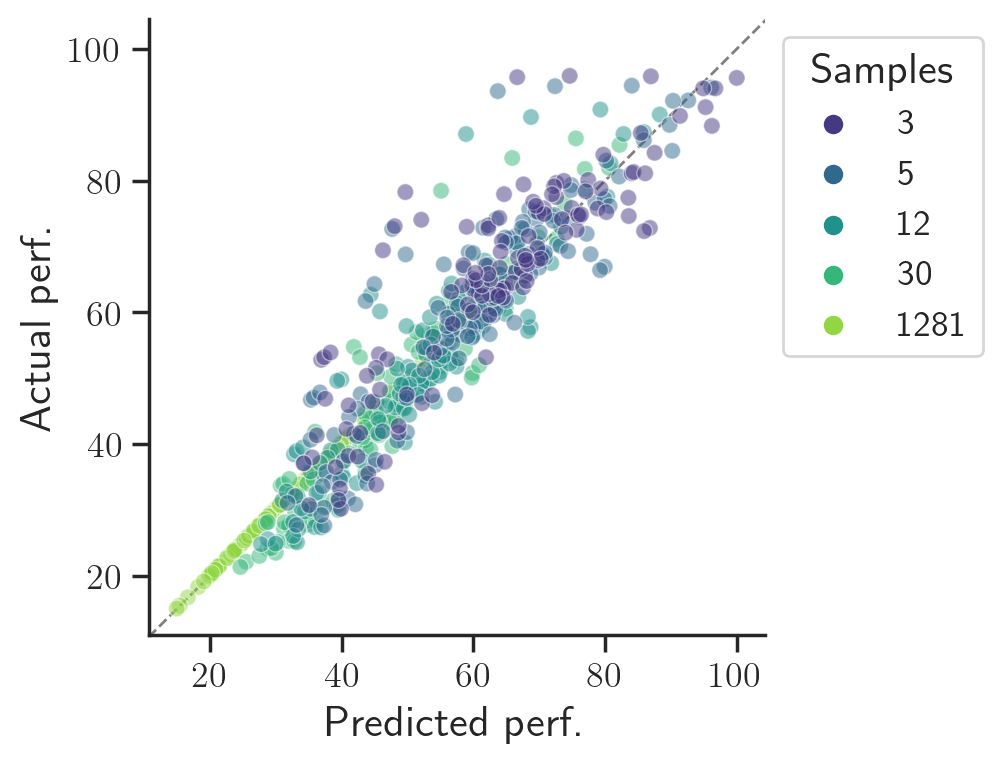

In [1025]:
results = results_1param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    df=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    sns.scatterplot(df, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)

We can further improve the model by noticing that the importance of usability changes also depending on the number of samples.

In [1051]:
def f_pred_our2b(params, data, model_var):
    return (data["enc_gen"] +  (1-params["B"])*data["train_train"]+ (params["B"] *data["train_train"]  + data["probe_gen"]) * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_2param = scalinglaw(data, **kwargs) 

*Train* RMSE: 4.3041. R2: 0.9488
*Test* RMSE: 4.7715. R2: 0.9319


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          4.262986                 3.196917   
r2                            0.914166                 0.923255   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   6.789484                6.081435    0.140814  
r2                     0.858534                0.857904    0.999763

param              B     alpha
value mean  0.445954  0.148196
      sem        NaN       NaN

N param: 2


We indeed see that the performance improves

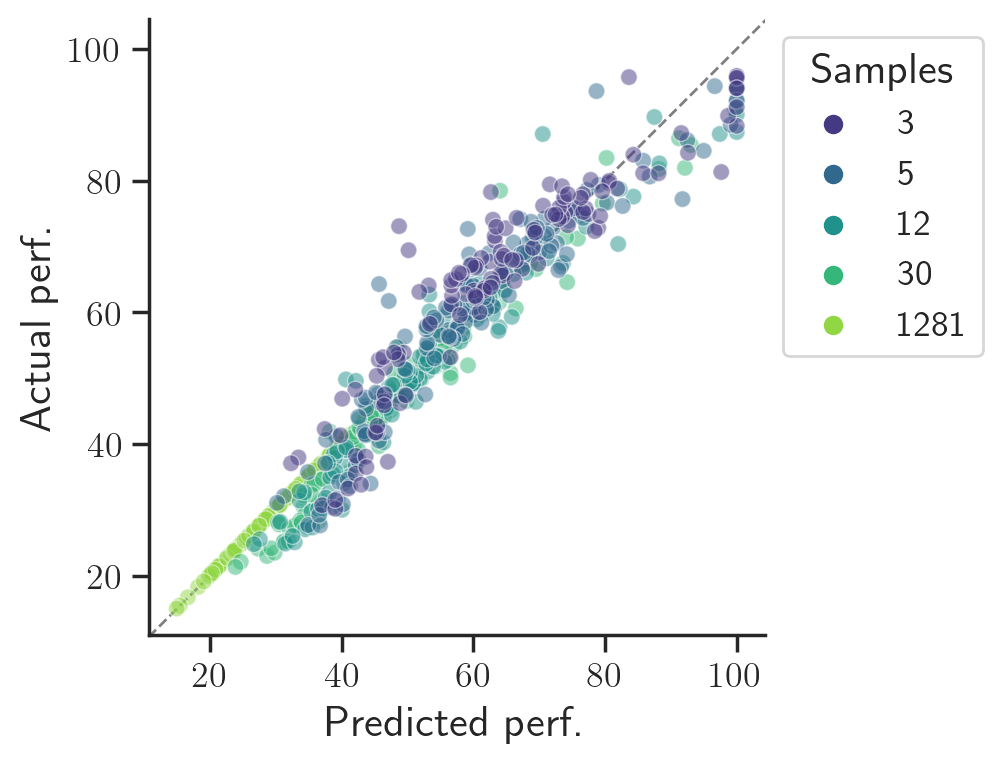

In [1033]:
results = results_2param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    df=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    sns.scatterplot(df, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)

What about if you specifically hold out some number of samples?

In [1034]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
               **kwargs) 

*Train* RMSE: 4.4065. R2: 0.9500
*Test* RMSE: 4.6386. R2: 0.9237


metrics  train-nperclass-30_test  train-nperclass-5_test
rmse                    3.917370                5.221061
r2                      0.927694                0.892227

param              B     alpha
value mean  0.530161  0.146886
      sem        NaN       NaN

N param: 2


One important advantage of our method is that we can actually predict the performance of completely new models which is not possible if you need to fit a scaling law for each model. 
For example let's predict the performance of all models from 2022 or all contrastive methods.

In [1035]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["ssl_mode"].isin(["contrastive"]),
               **kwargs) 

*Train* RMSE: 4.9138. R2: 0.9348
*Test* RMSE: 3.6890. R2: 0.9568


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          3.000196                 2.749232   
r2                            0.949234                 0.953327   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   5.939967                4.234997    0.144679  
r2                     0.808597                0.903936    0.999664

param              B     alpha
value mean  0.551858  0.143311
      sem        NaN       NaN

N param: 2


In [1036]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["year"].isin([2022]),
               **kwargs) 

*Train* RMSE: 4.4096. R2: 0.9443
*Test* RMSE: 4.9041. R2: 0.9165


metrics  train-balsbst-ntrain0.01_test  train-nperclass-30_test  \
rmse                          5.366186                 4.846532   
r2                            0.845357                 0.820842   

metrics  train-nperclass-3_test  train-nperclass-5_test  train_test  
rmse                   5.914315                5.742209    0.127858  
r2                     0.886916                0.876125    0.999572

param              B    alpha
value mean  0.483129  0.14871
      sem        NaN      NaN

N param: 2


### Probes trained with aug

todo

### Statistics

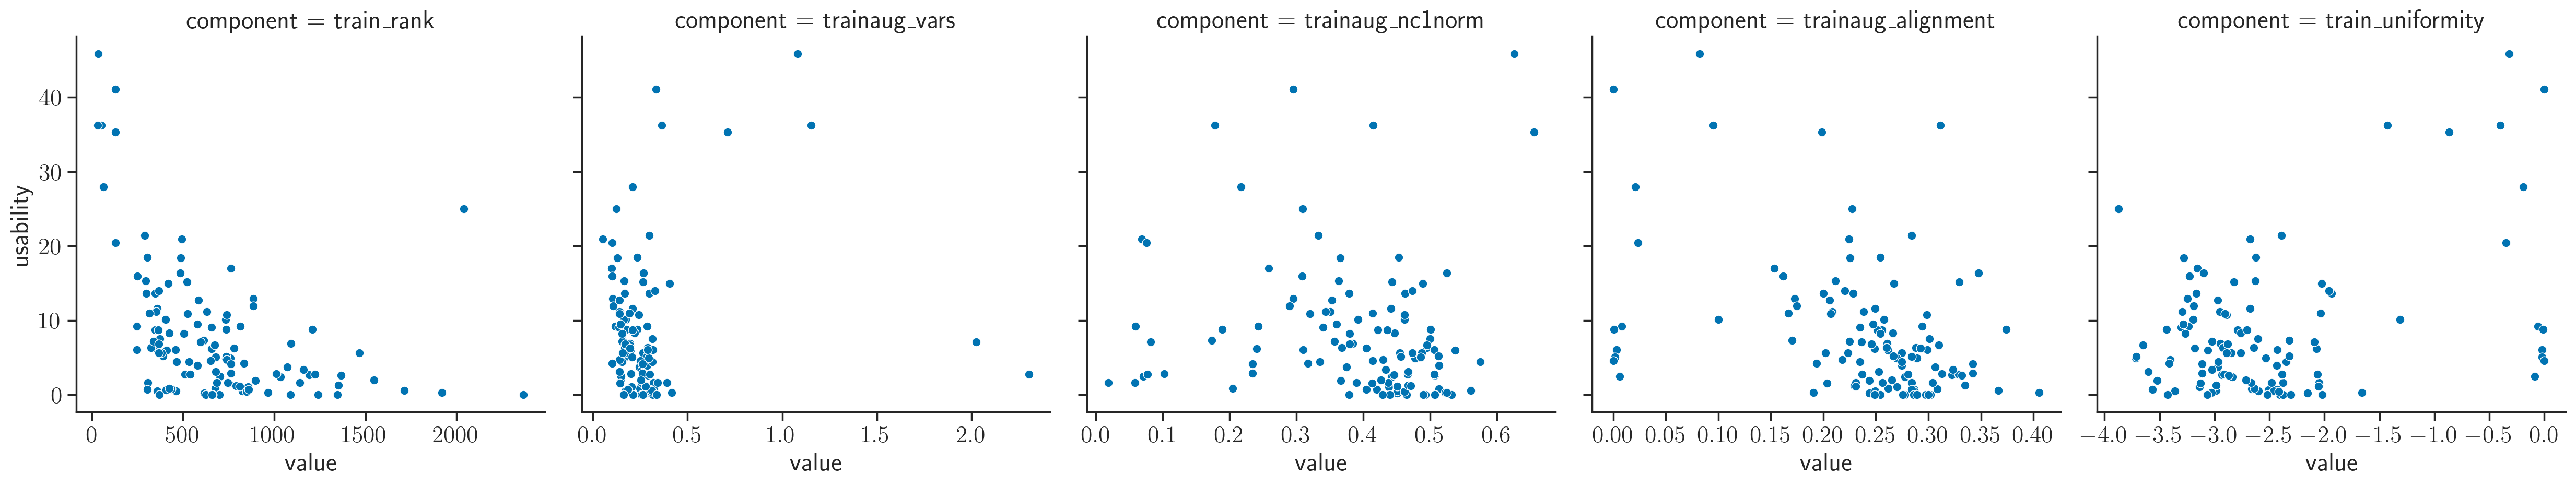

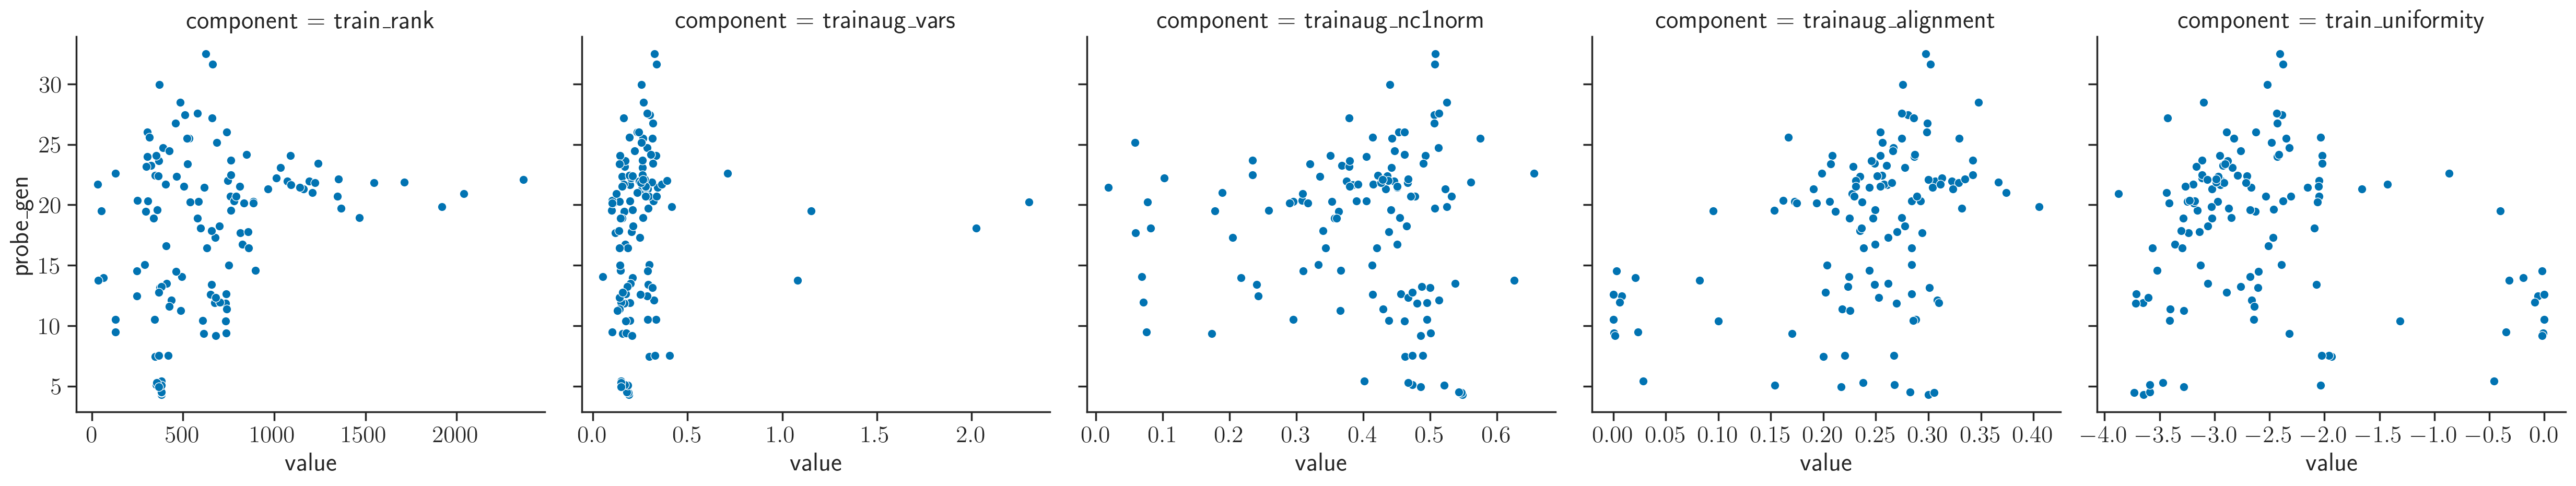

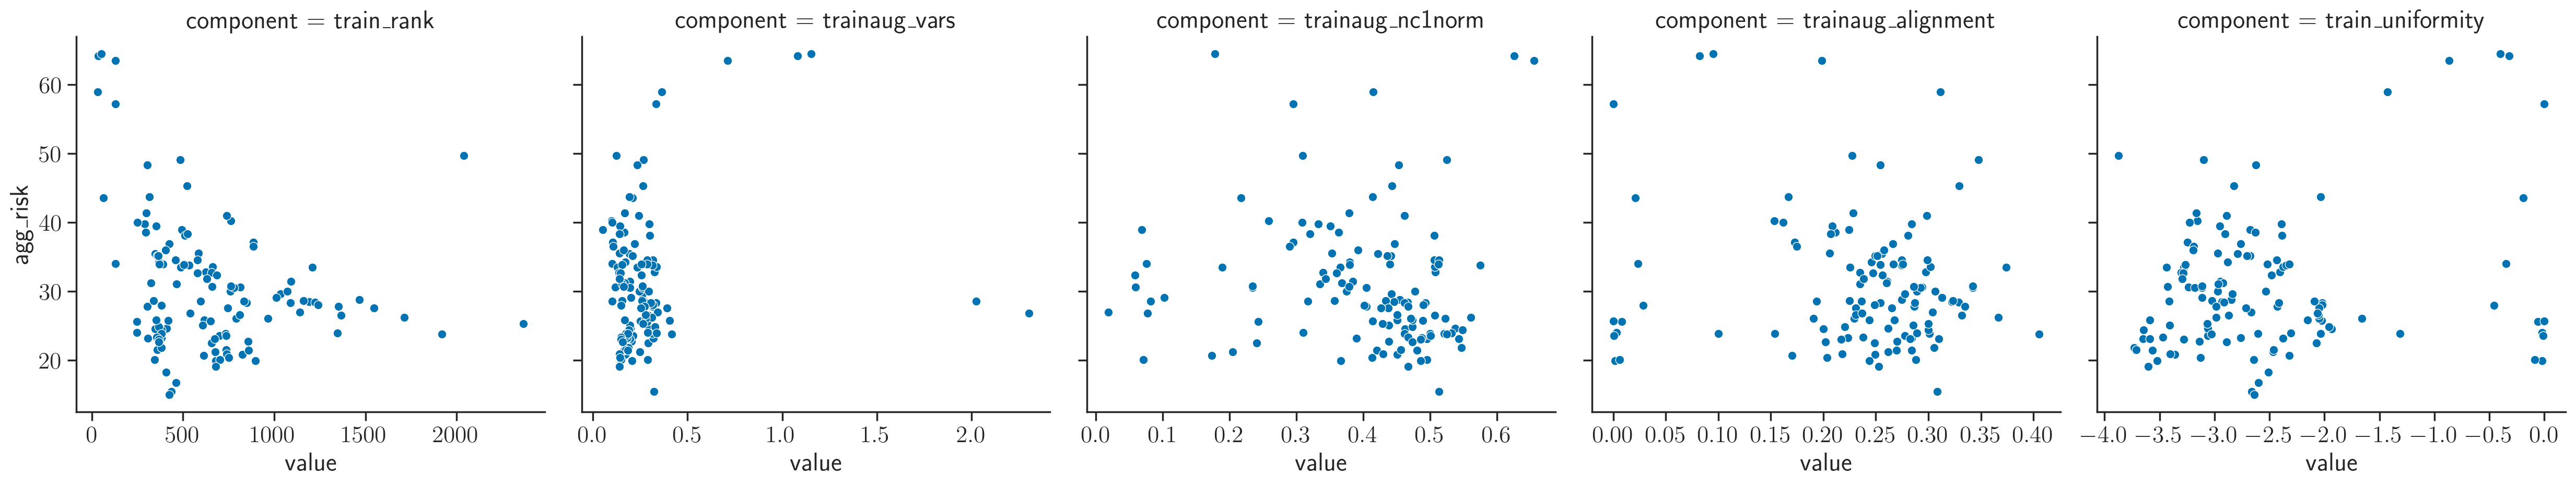

In [49]:
for m in ["usability","probe_gen","agg_risk"]:
    with plot_config():
        g=sns.relplot(data=melt(df, components=CORE_STATISTICS), 
                      x="value", y=m, col="component", 
                      facet_kws={'sharey': True, 'sharex': False})

### Dimensionality

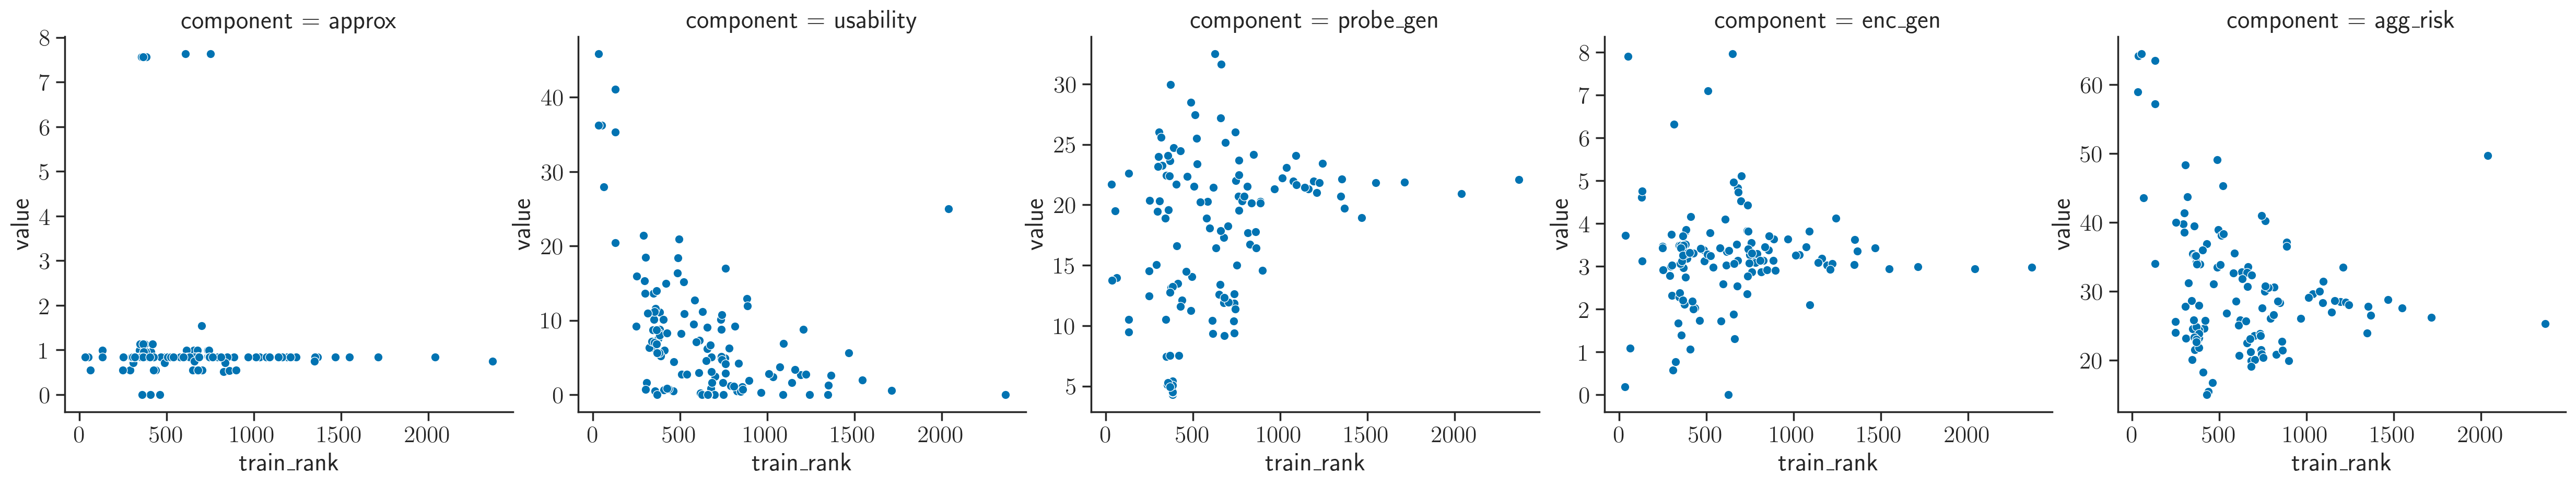

In [56]:
with plot_config():
    g=sns.relplot(data=melted, x="train_rank", y="value", col="component", facet_kws={'sharey': False})
    #g.set(xscale="log")

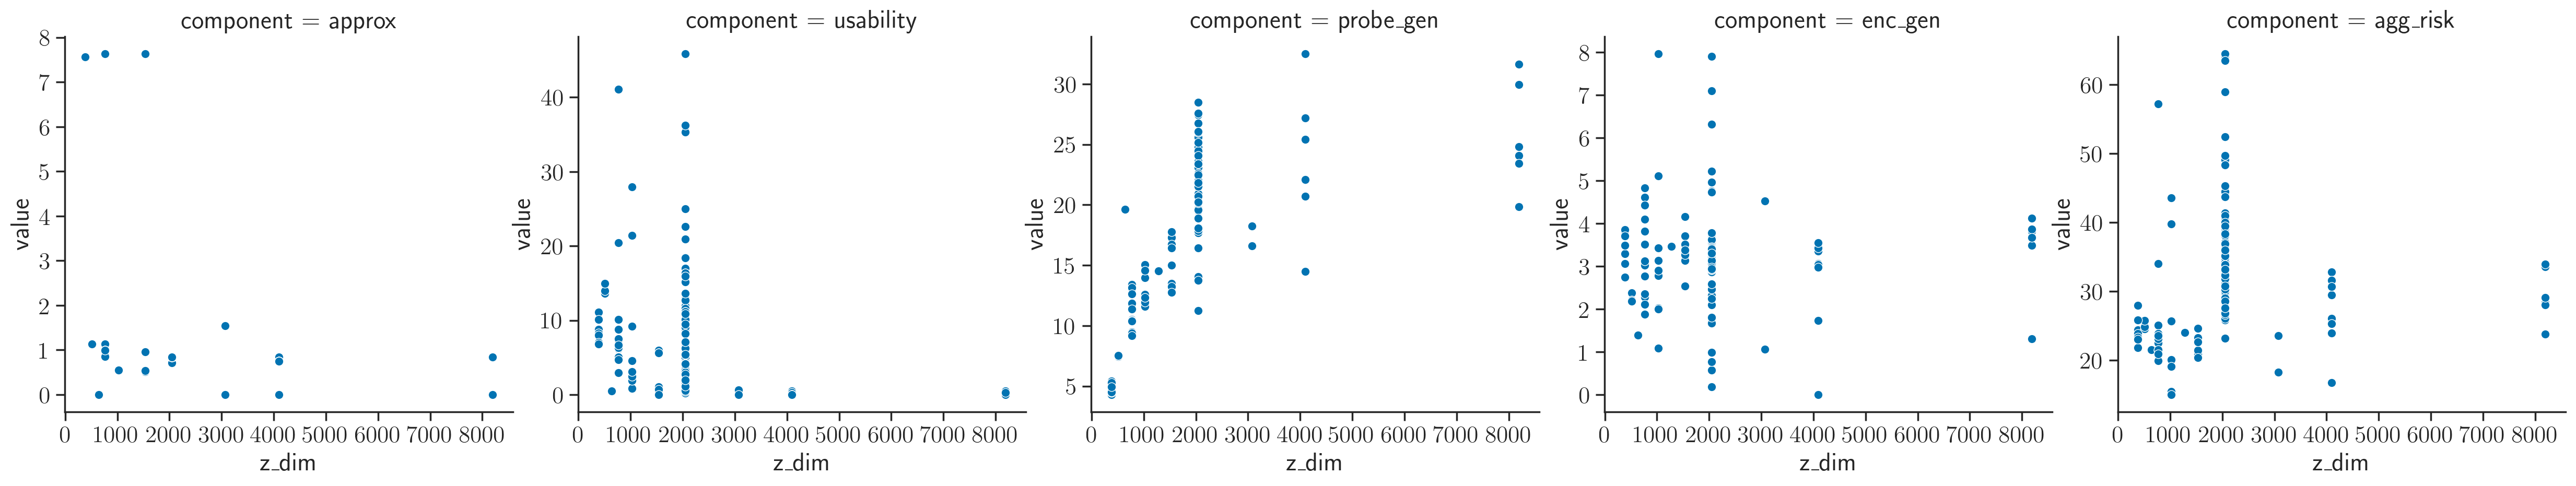

In [67]:
with plot_config():
    g=sns.relplot(data=melted, x="z_dim", y="value", col="component", facet_kws={'sharey': False, 'sharex': True})
    #g.set(xscale="log")

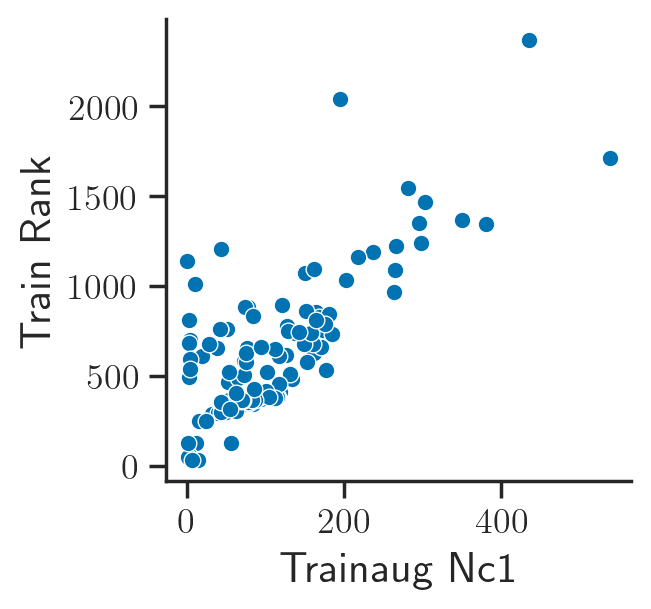

In [114]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    
    data=df.rename(columns=PRETTY_RENAMER)
    #data["Year"] = data["Year"].astype("category")
    sns.scatterplot(data=data, x="Trainaug Nc1", y="Train Rank", ax=ax)#, hue="Year"

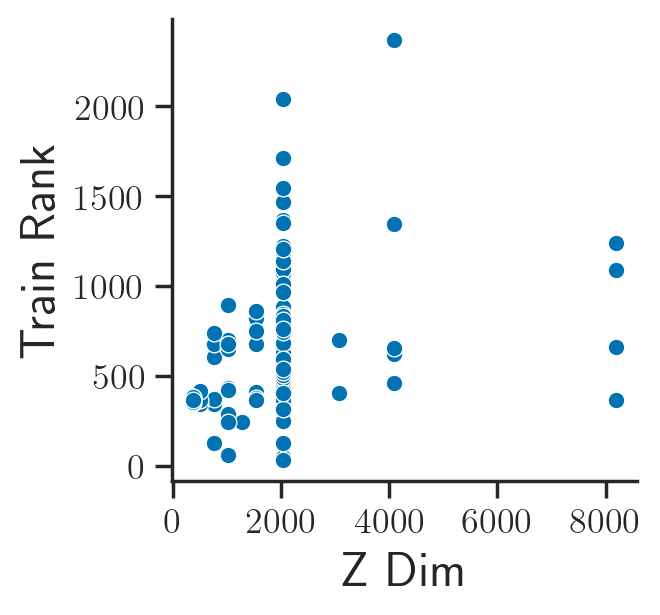

In [24]:
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    
    data=df.rename(columns=PRETTY_RENAMER)
    #data["Year"] = data["Year"].astype("category")
    sns.scatterplot(data=data, x="Z Dim", y="Train Rank", ax=ax)#, hue="Year"

### Features

In [10]:
X,y=prepare_sklearn(df)

In [11]:
# from pandas_profiling import ProfileReport



# path = Path("notebooks")/"profile.pp"
# if path.exists():
#     profile = ProfileReport()
#     profile.load(path)
# else:
#     profile = ProfileReport(X)
#     profile.to_html()
#     profile.dump(path)
# profile

## Naive plots
The following are naive plots where we plot everything without thinking about confounders. As a result they are likely meaningless for interpretaition but should rather be used as ways to understand our data.


### Effect of type of method

Now let's consider the effect of the type of method

**Hypothesis** ISSL showed that contrastive, distillation and clustering all optimize nearly the right objective and can be made correct with minor differences, so we hypothesize that usability for them must be good.

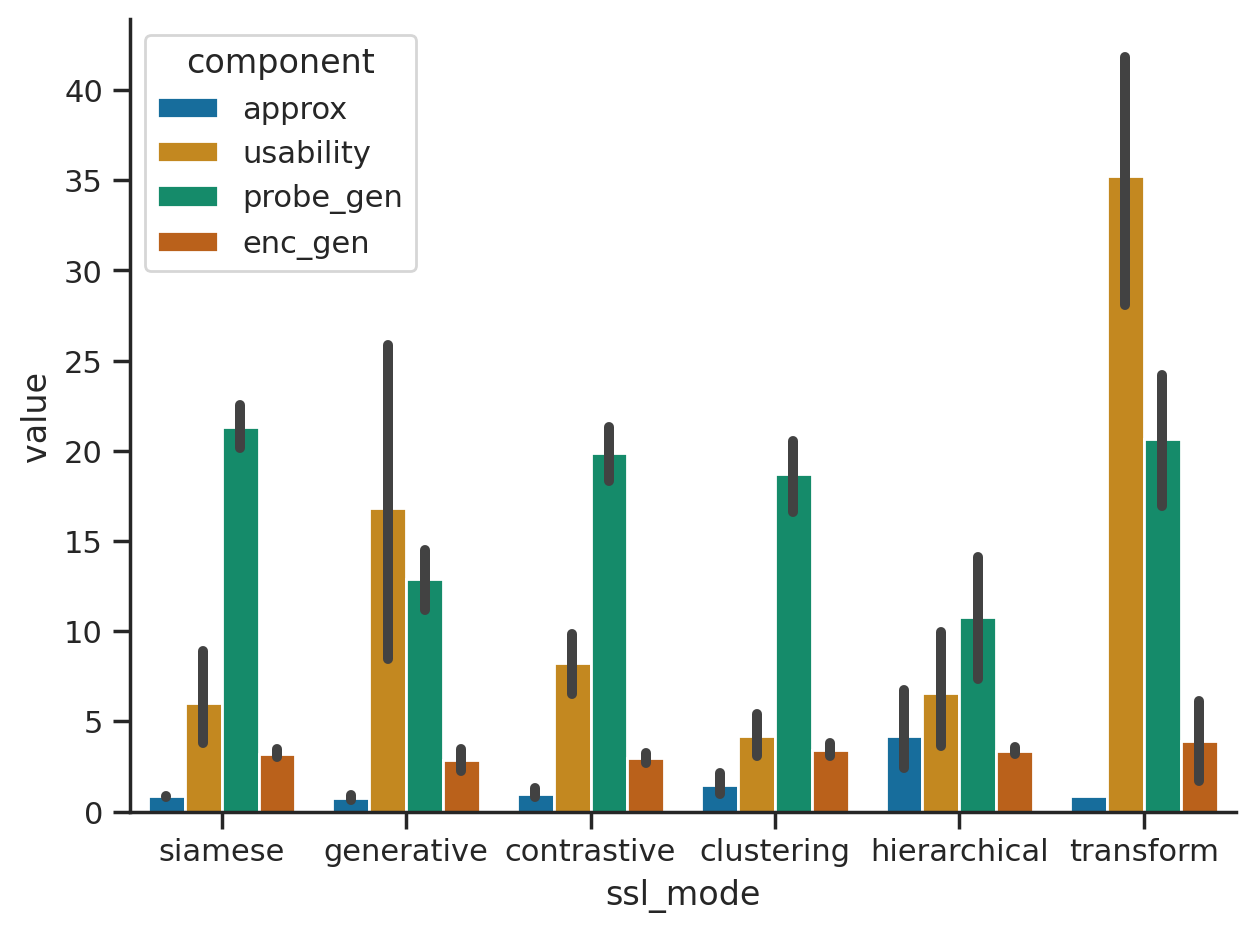

In [20]:
with plot_config(font_scale=1):
    sns.barplot(data=melted_onlyComp, x="ssl_mode", y="value", hue="component")
    plt.tight_layout()

### Effect of epochs

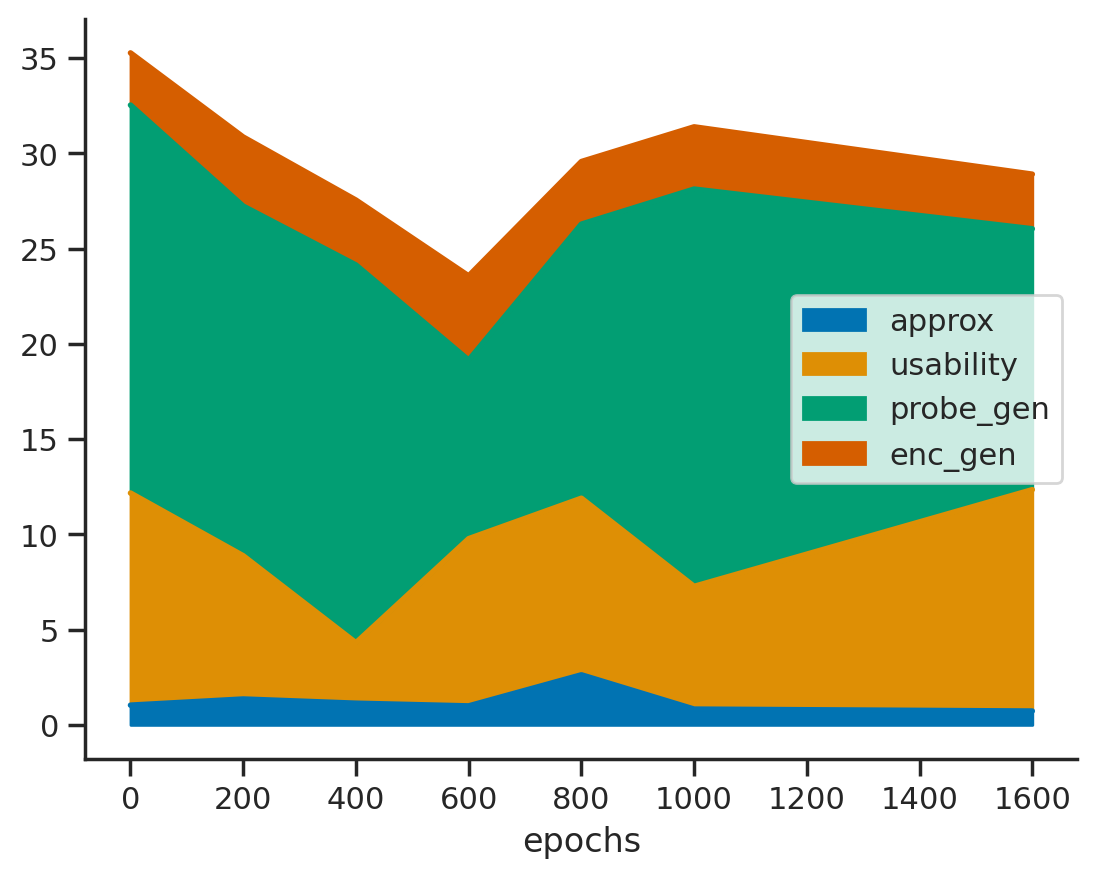

In [21]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["epochs"]])
    curr_df.epochs = curr_df.epochs // 200 * 200 # coarse grains
    curr_df.groupby("epochs").mean().plot.area()

Doesn't show much

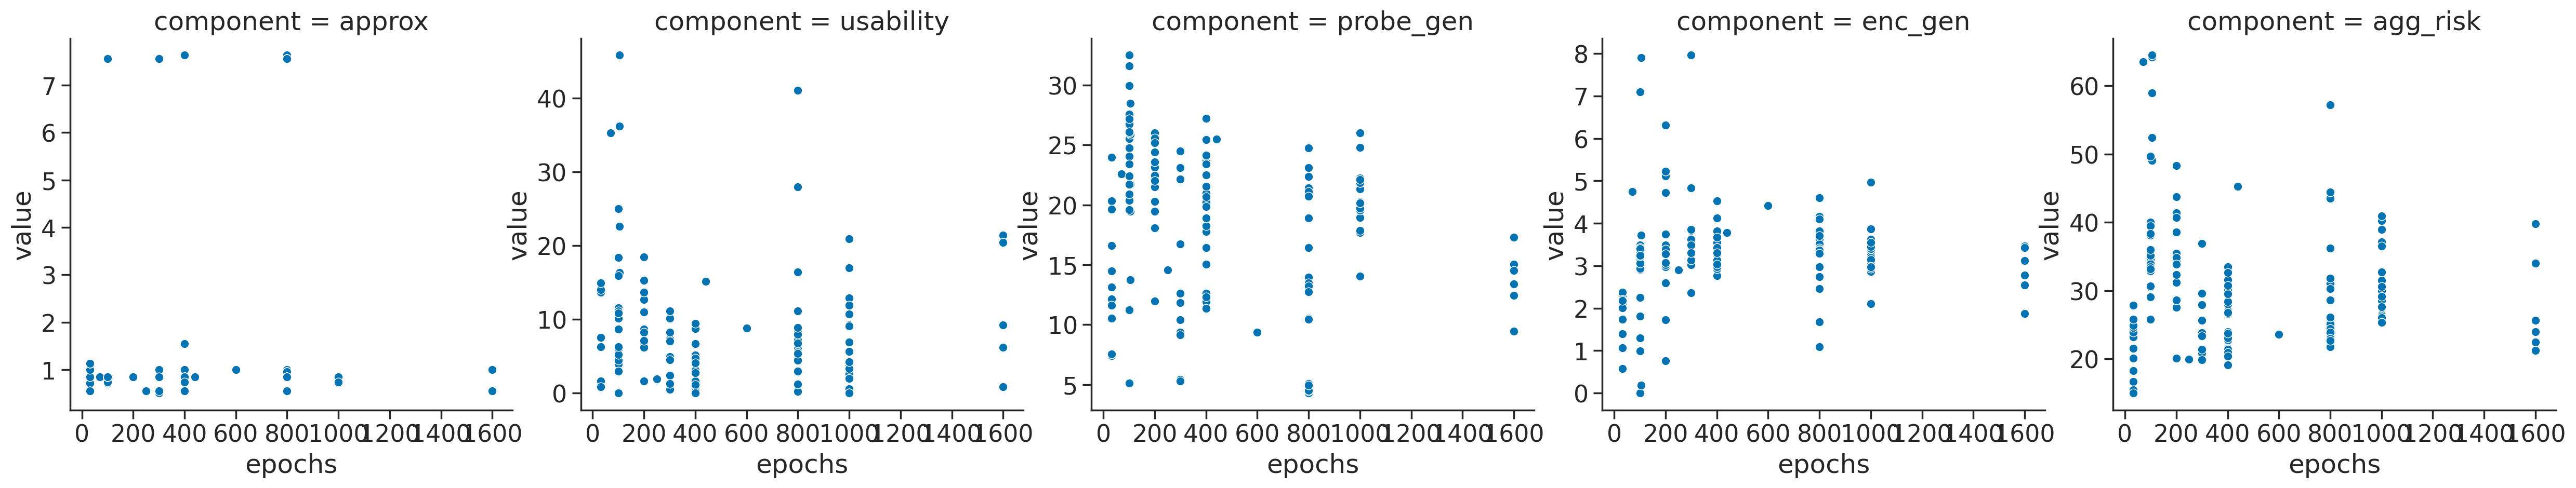

In [22]:
with plot_config():
    sns.relplot(data=melted, x="epochs", y="value", col="component", facet_kws={'sharey': False})

### Effect of batch size

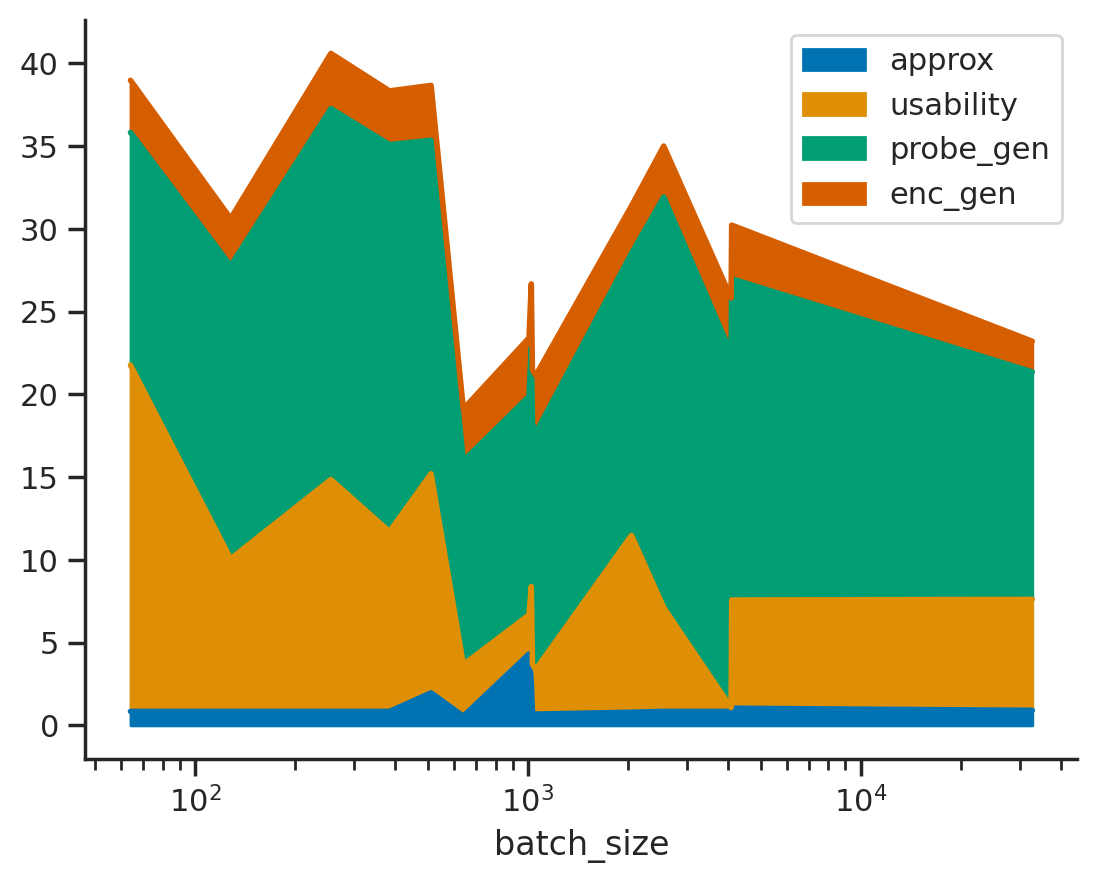

In [23]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["batch_size"]])
    curr_df.groupby("batch_size").mean().plot.area(logx=True)

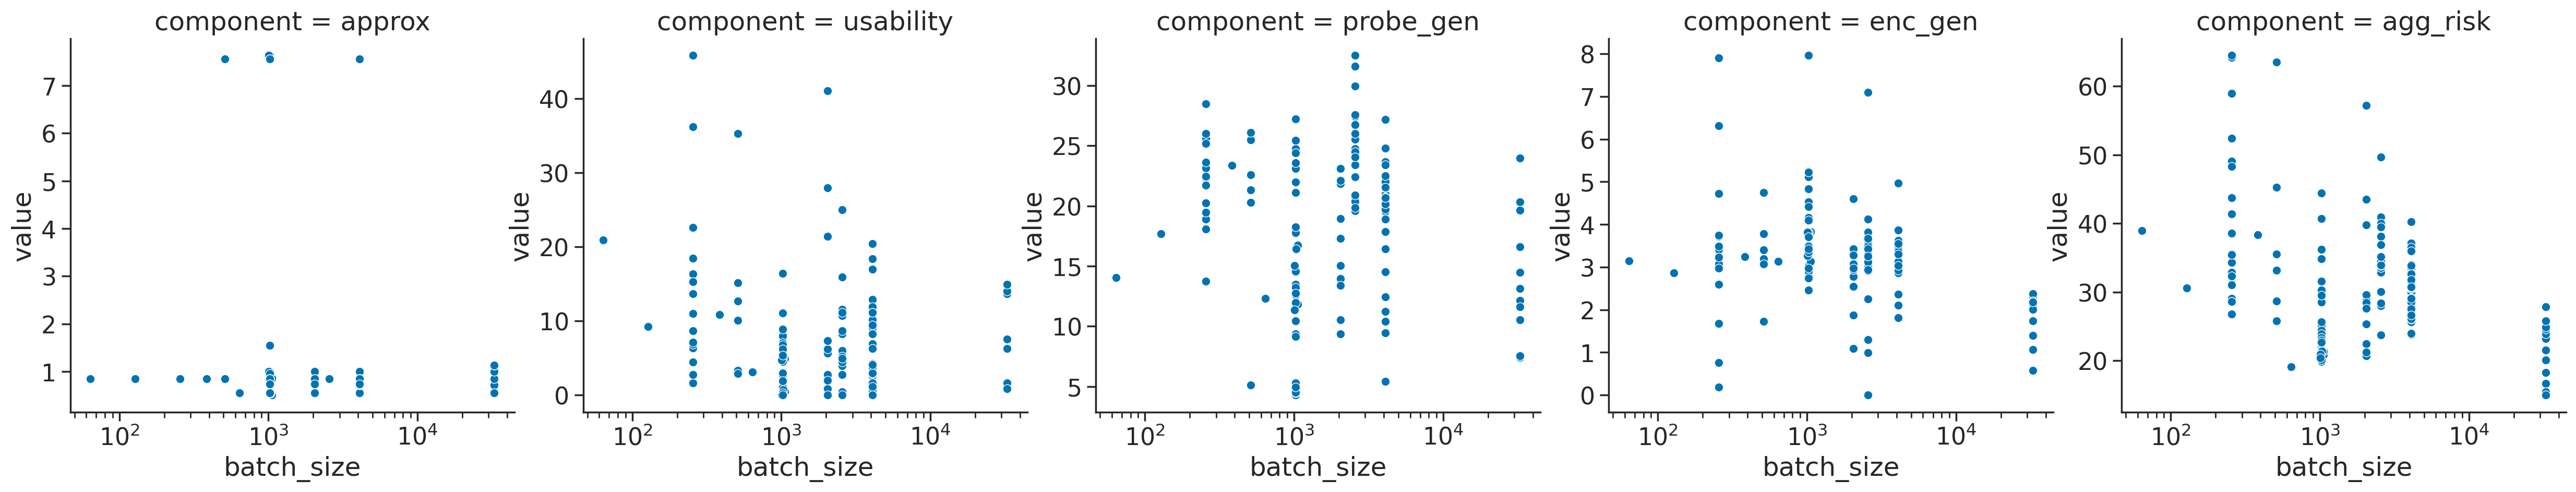

In [24]:
with plot_config():
    g=sns.relplot(data=melted, x="batch_size", y="value", col="component", facet_kws={'sharey': False})
    g.set(xscale="log")

### Effect of multicrops

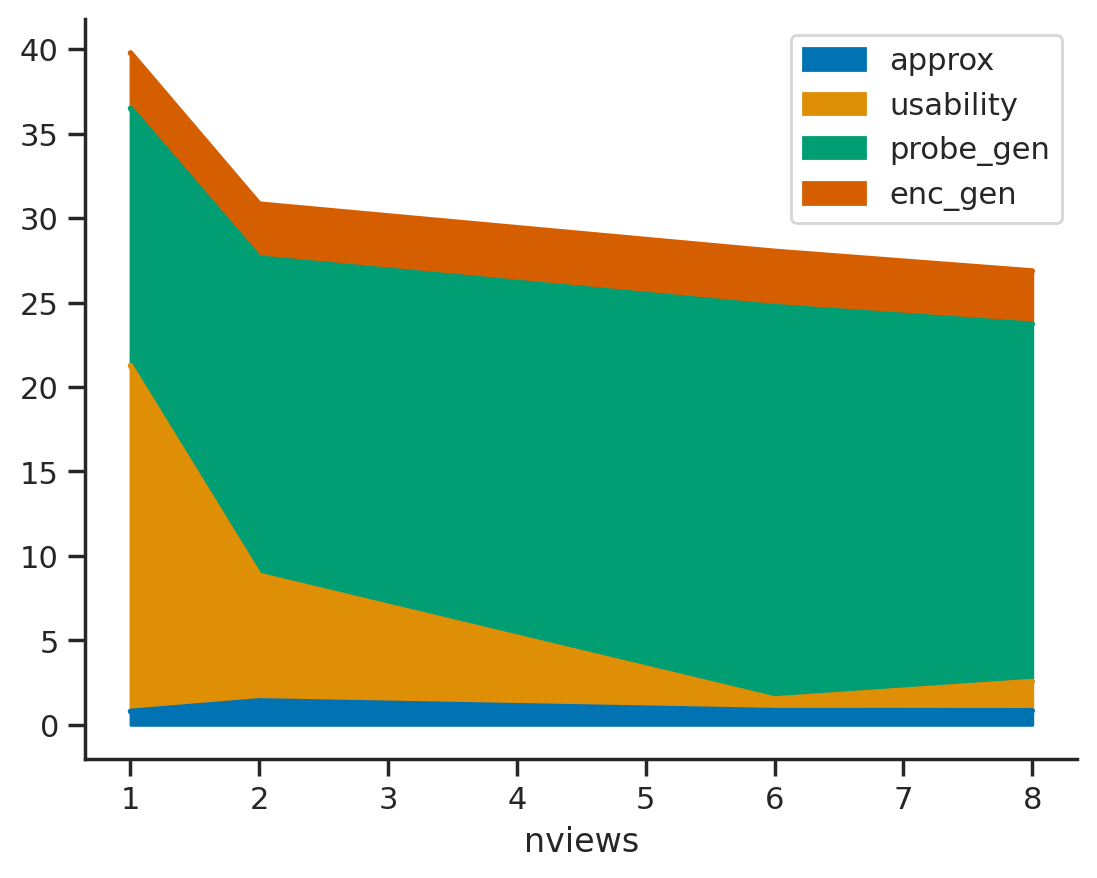

In [25]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["nviews"]])
    curr_df.groupby("nviews").mean().plot.area()

We see that nviews seems to have a huge effect on usability but detrimental effect on probing generalization. That being said there is probably a big confounder as few models (and usually more recent) use multicrops.

### Effect of dimensionality

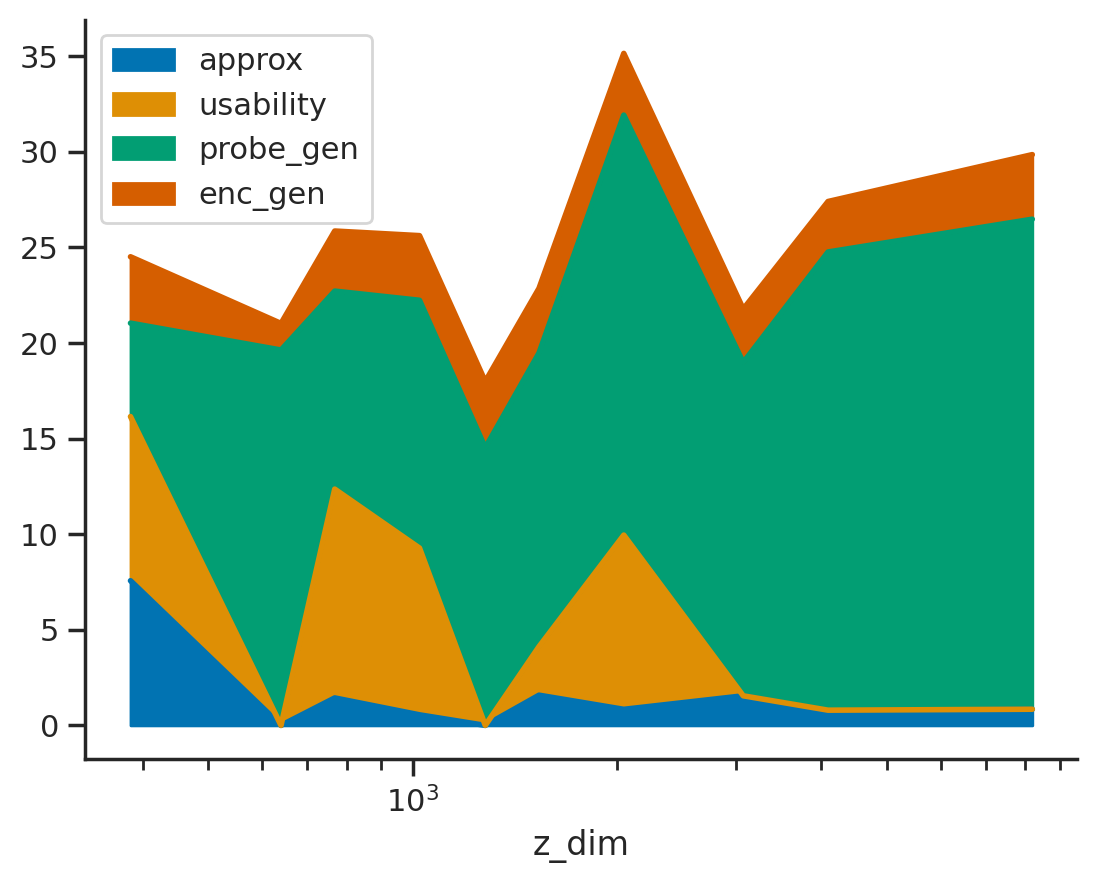

In [26]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["z_dim"]])
    curr_df.groupby("z_dim").mean().plot.area(logx=True)

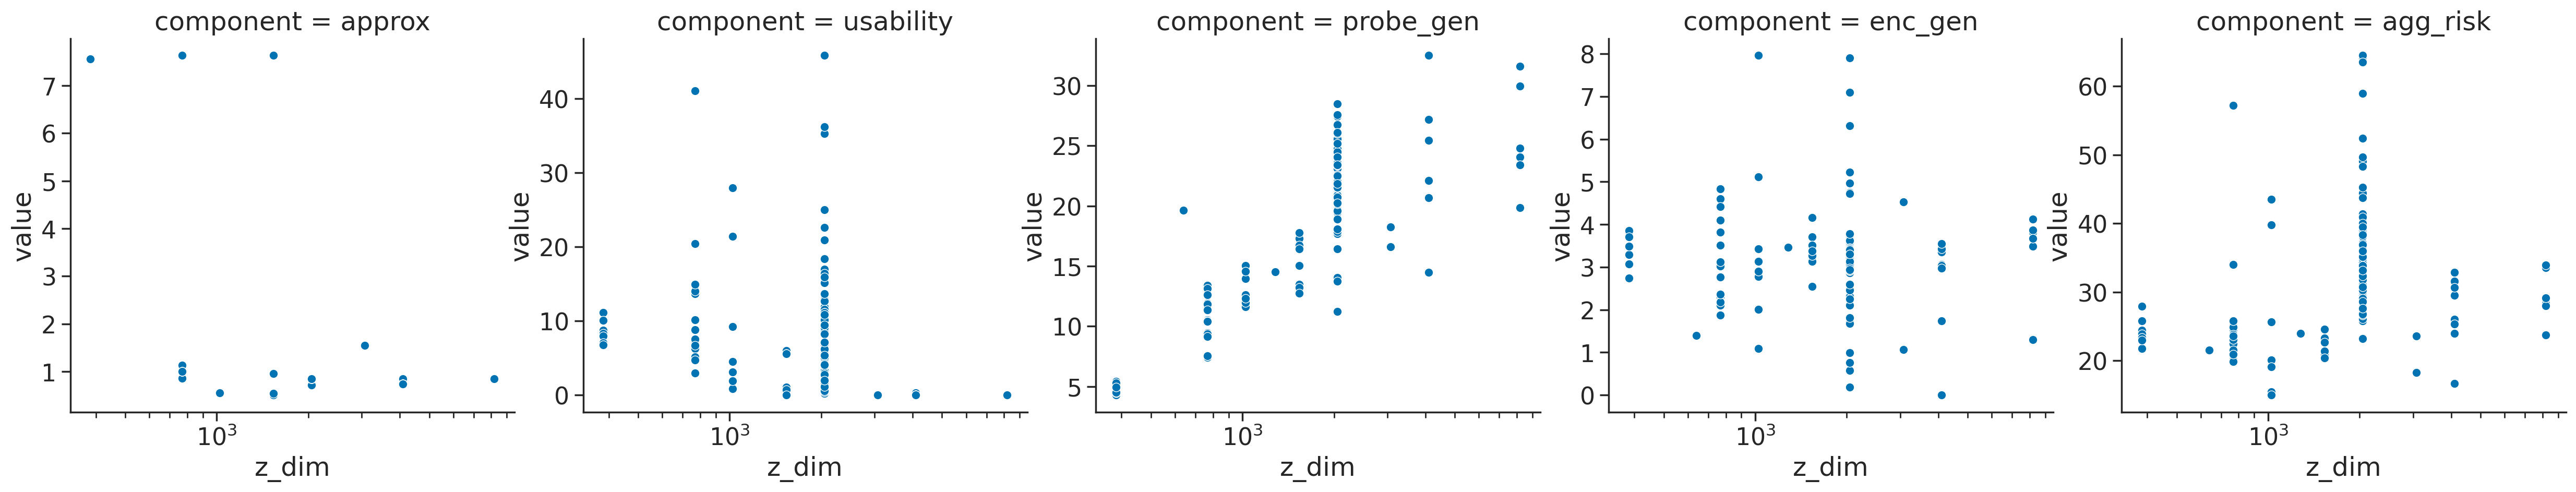

In [27]:
with plot_config():
    g=sns.relplot(data=melted, x="z_dim", y="value", col="component", facet_kws={'sharey': False})
    g.set(xscale="log")

### Effect of architecture

#### N parameters

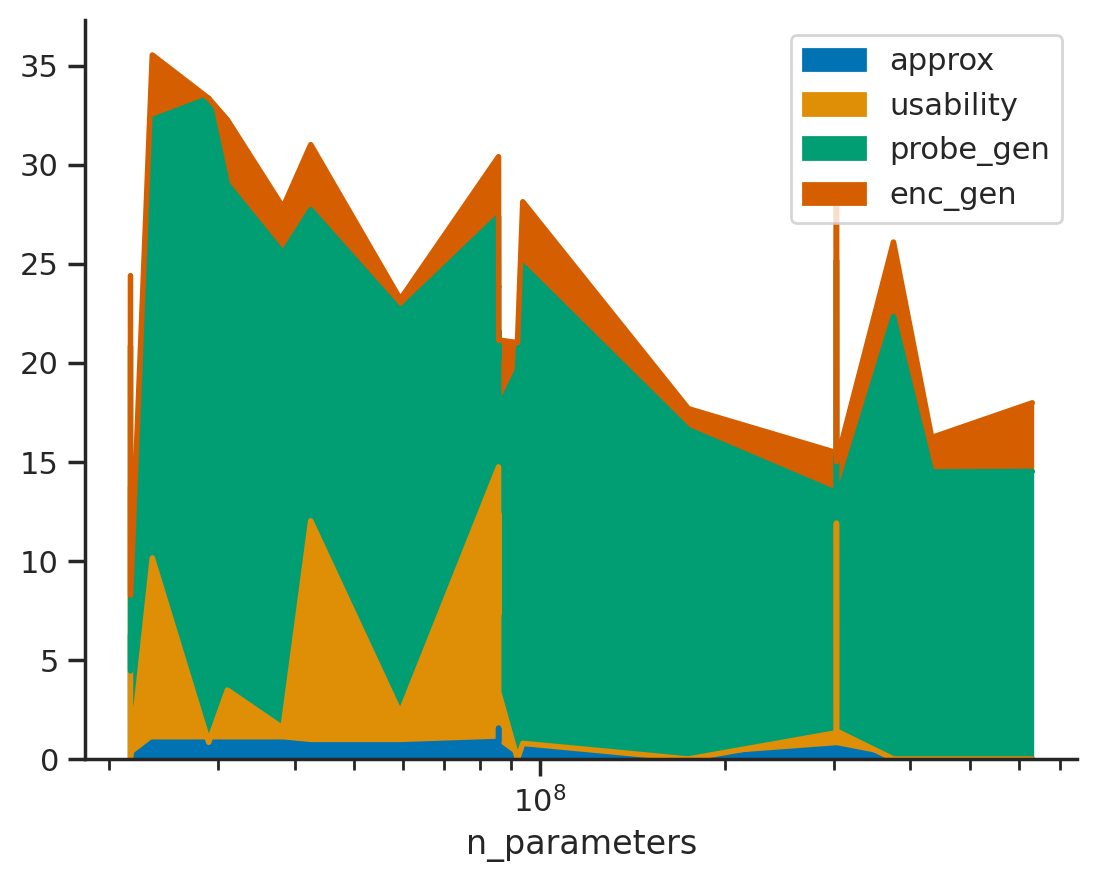

In [28]:
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["n_parameters"]])
    curr_df.groupby("n_parameters").mean().plot.area(logx=True)

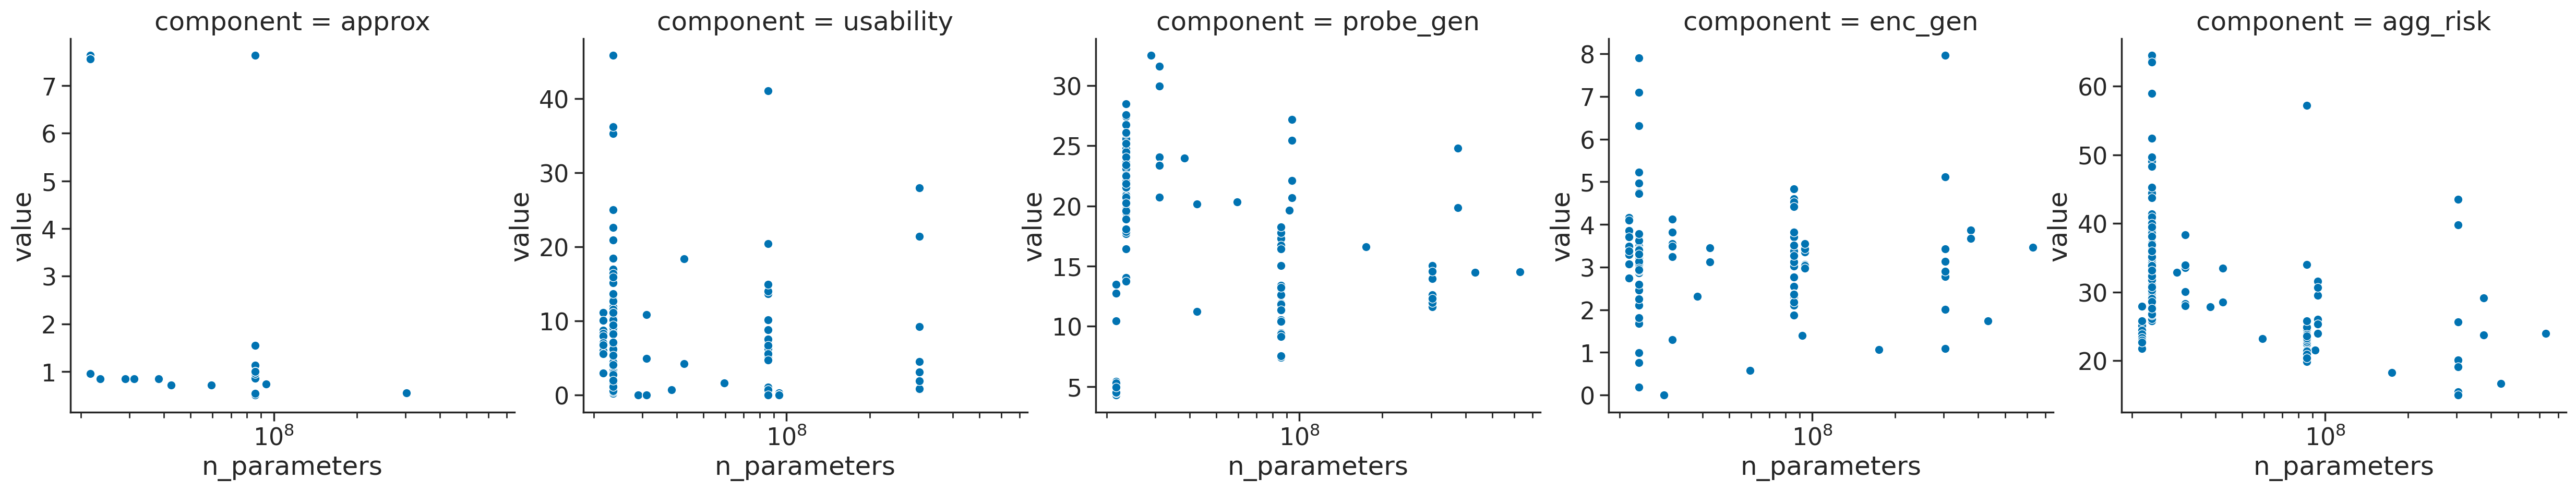

In [29]:
with plot_config():
    g=sns.relplot(data=melted, x="n_parameters", y="value", col="component", facet_kws={'sharey': False})
    g.set(xscale="log")

#### ViT vs ResNet

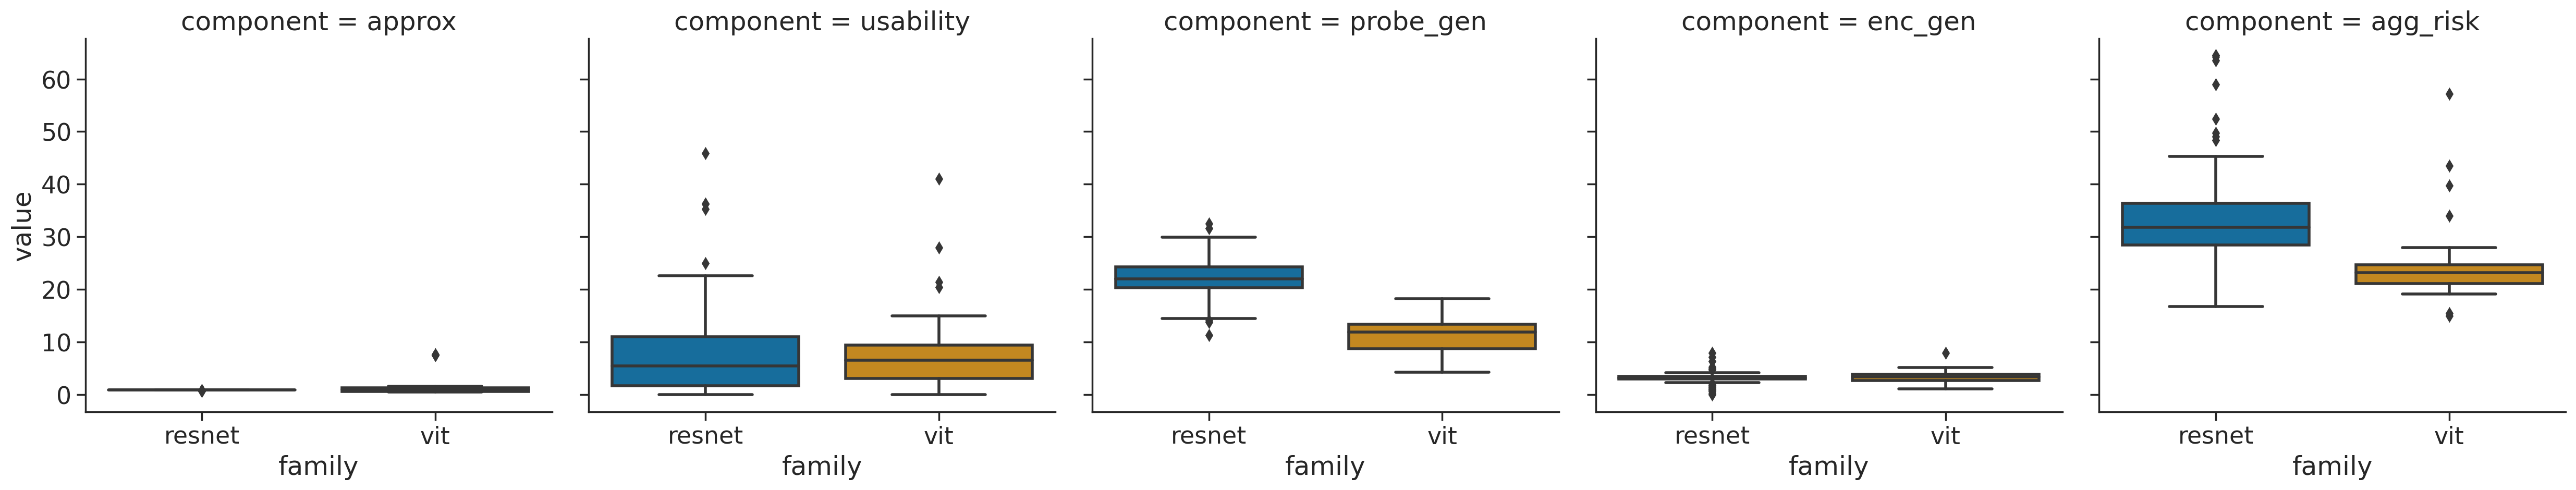

In [30]:
with plot_config():
    g=sns.catplot(data=melted, x="family", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#g.set(xscale="log")

Appproximation gap seems slightly better.

#### Effect of patch size

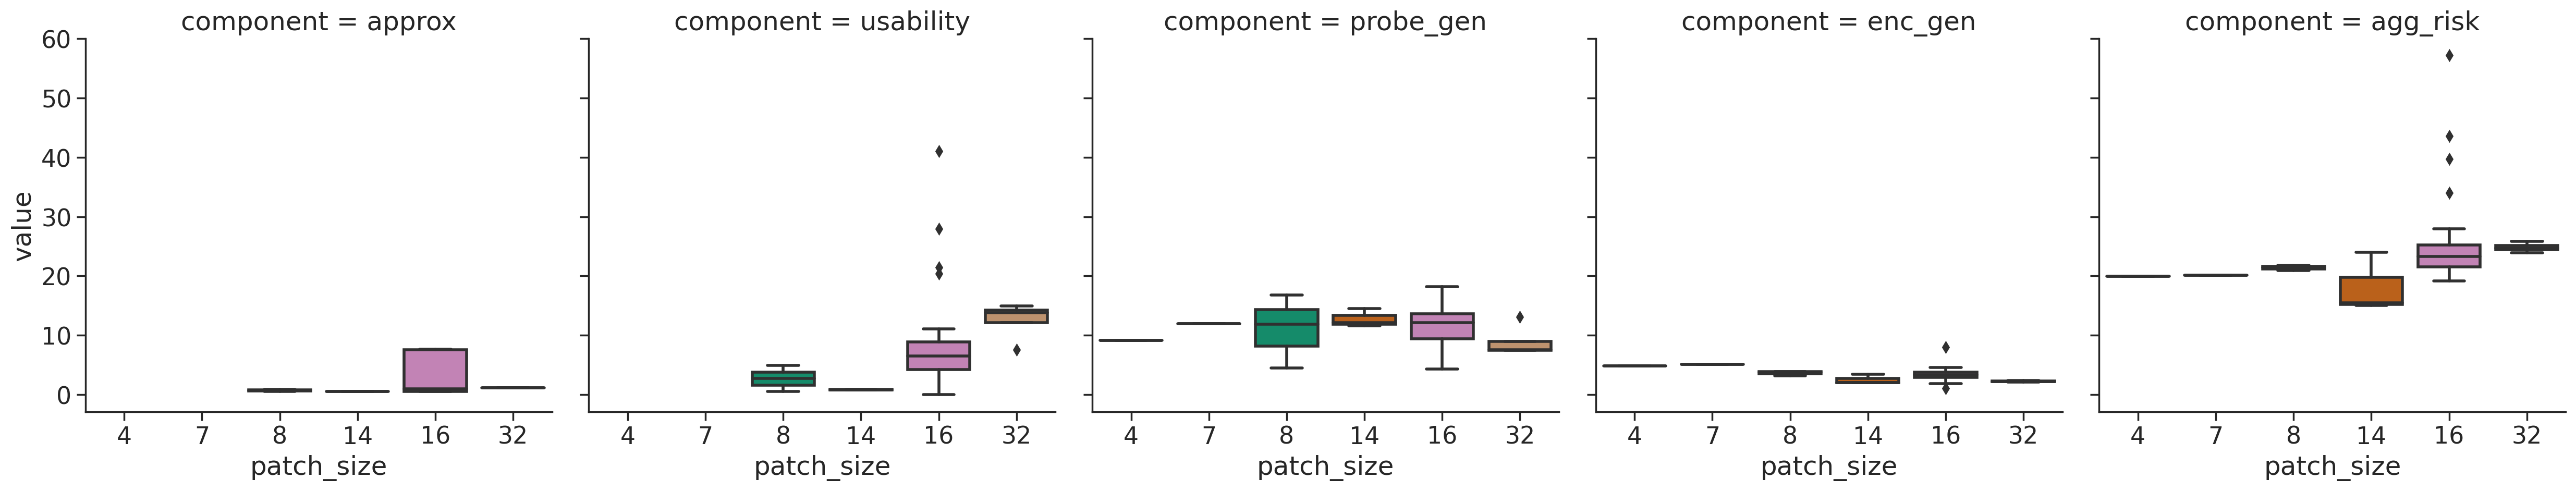

In [31]:
with plot_config():
    g=sns.catplot(data=melted[melted.family=="vit"], 
              x="patch_size", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#g.set(xscale="log")

Larger patch size is worst approx

### Effect of projection 

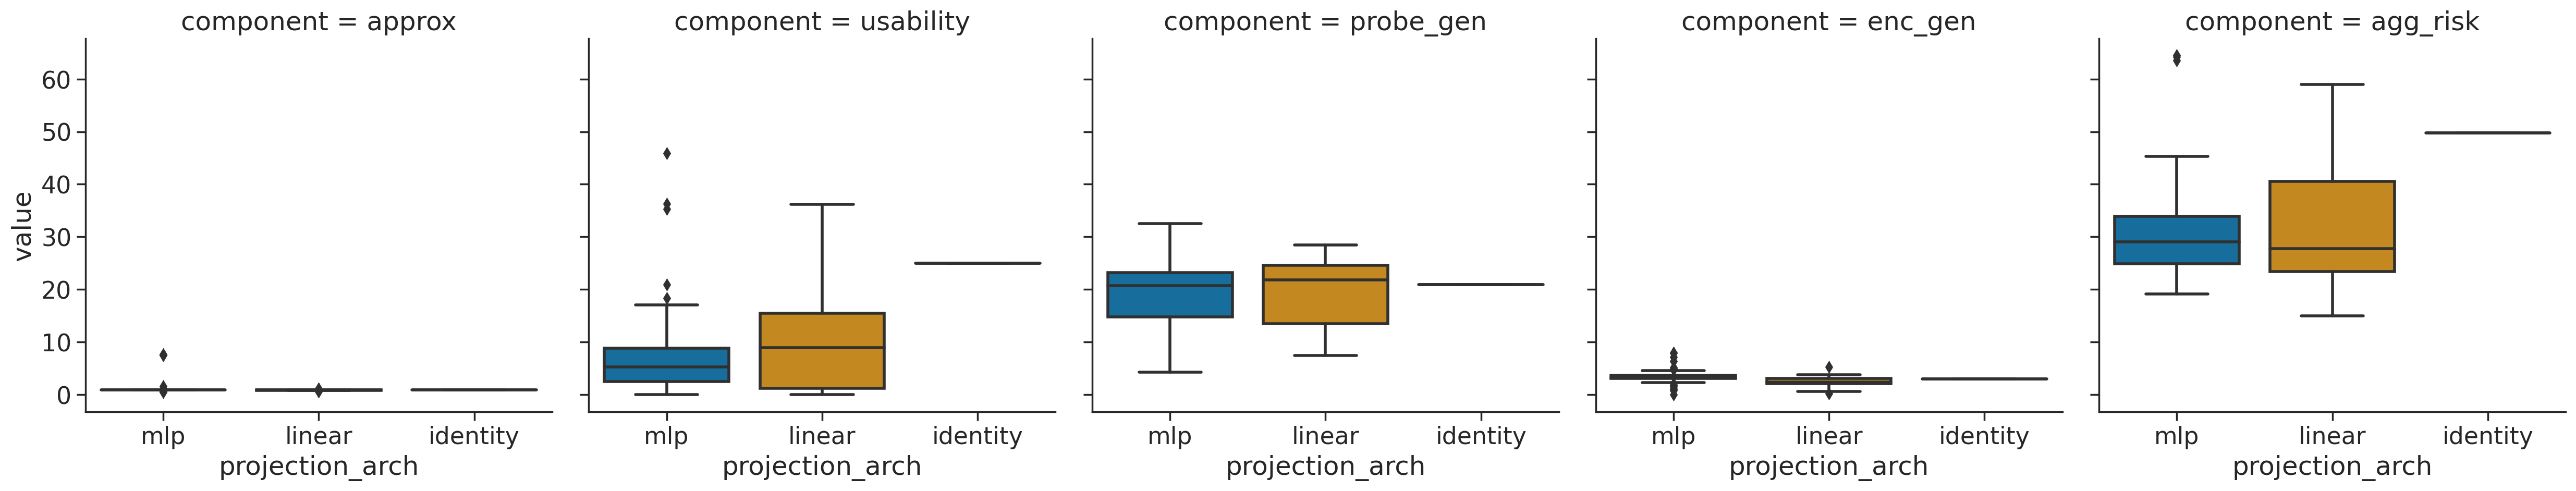

In [32]:
with plot_config():
    g=sns.catplot(data=melted, x="projection_arch", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#g.set(xscale="log")

### Effect of pretraining data

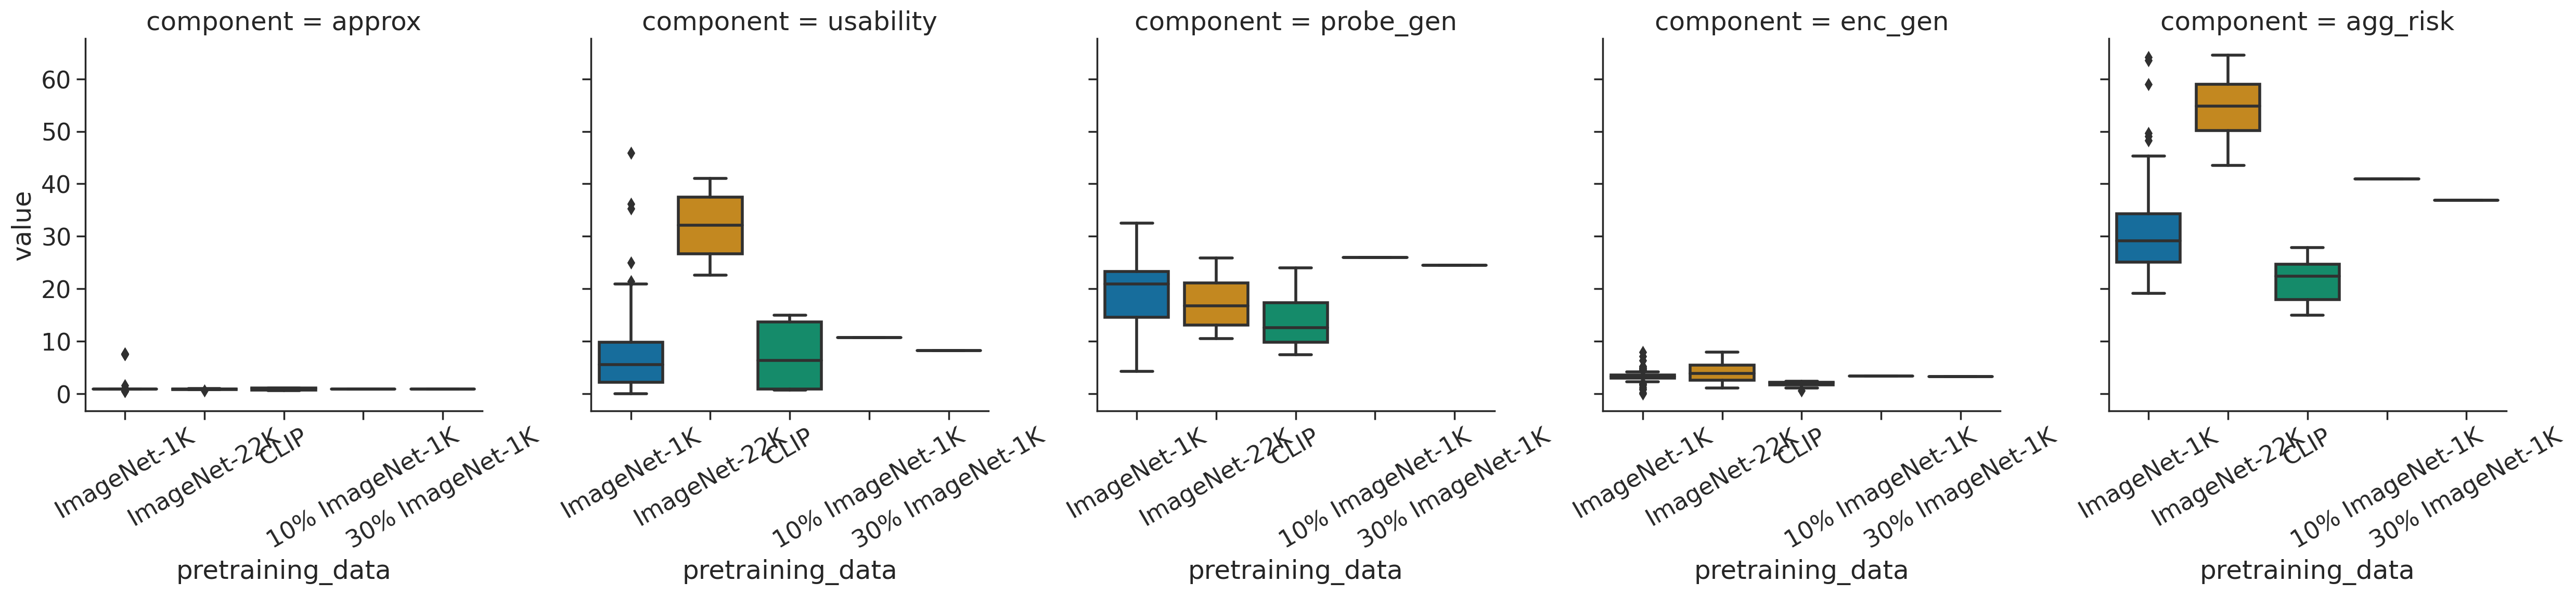

In [33]:
with plot_config():
    g=sns.catplot(data=melted, x="pretraining_data", y="value", col="component", facet_kws={'sharey': False}, kind="box")
    g.set_xticklabels(rotation=30)

### Effect of finetuning

In [34]:
curr_df = df.copy()
curr_df["is_finetuned"] = curr_df.finetuning_data.isna()

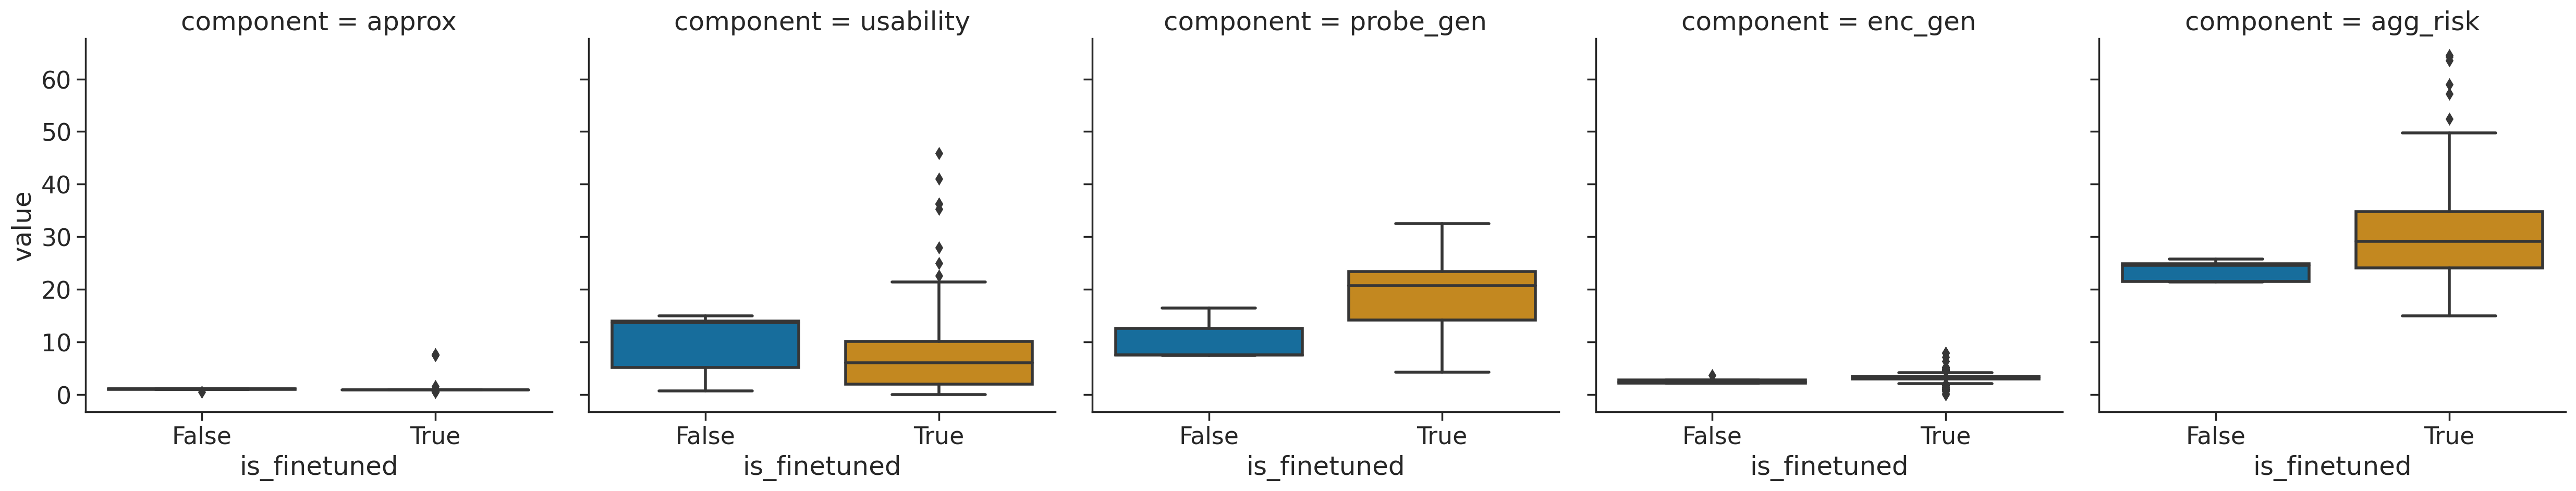

In [35]:
with plot_config():
    g=sns.catplot(data=melt(curr_df), x="is_finetuned", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#g.set(xscale="log")

### Old derivations

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(m,n) = \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(m,n)$$ 
where $n$ is the number of samples and $m$ is the encoder. 
Now by standard scaling laws we also have:
$$ \mathrm{probe\_gen}(m,n) =  \mathrm{probe\_gen}(m,\infty) + \frac{C(m)}{n^{\alpha(m)}}$$

The issue is we do not have $\mathrm{probe\_gen}(m,\infty)$ but given that we know the decomposition at a specific $n=|\mathcal{D}_{train}|$ (i.e. ImageNet training size), we can use:
$$\mathrm{probe\_gen}(m,\infty)  =  \mathrm{probe\_gen}(m,|\mathcal{D}_{train}|) - \frac{C(m)}{|\mathcal{D}_{train}|^{\alpha(m)}}$$
so 

$$
\begin{aligned}
\mathrm{perf}(m,n) &= \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) - \frac{C}{|\mathcal{D}_{train}|^{\alpha}} + \frac{C}{n^{\alpha}} \\
\mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}) &=   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) + C \left(\frac{1}{n^{\alpha}} - \frac{1}{|\mathcal{D}_{train}|^{\alpha}} \right)  \\
\end{aligned}
$$

Assuming that $|\mathcal{D}_{train}| \gg 0$ we have 
$$
\log( \mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen})) \approx   \log \left(\mathrm{probe\_gen}(|\mathcal{D}_{train}|) + \frac{C}{n^{\alpha}} \right) 
$$



In [ ]:
def f_pred_param(params, data, model_var):
    return params["train_train"] +params["enc_gen"] + params["C"] *(1/(params["n"] ** params["alpha"]) - 1/(N ** params["alpha"]) ) + params["probe_gen"] 

_ = scalinglaw(data, 
               f_pred = f_pred_param,
               possible_params = ["C", "alpha"],
               independent_vars = dict(n=data["n_samples"], 
                                       probe_gen=data["probe_gen"],
                                       enc_gen=data["enc_gen"],
                                       train_train=data["train_train"],
                                      )
              ) 